In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import acos, degrees
from scipy.signal import find_peaks
import os.path
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy
import pylab as pl
from numpy.fft import fft
from scipy import stats
import numpy
from scipy import signal



C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
chunk_width = 250
#centr_rang = 110

In [3]:
#Function to extract angle using 3 points coordinate
def angle3pt(a, b, c):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
    math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


In [4]:
def getridofAngleJumps(alpha):
    alpha_rad = [x*(np.pi)/180 for x in alpha]
    alpha_rad = np.array(alpha_rad)
    alpha_rad[~np.isnan(alpha_rad)] = np.unwrap(alpha_rad[~np.isnan(alpha_rad)])
    alpha_unwrap= np.degrees(alpha_rad)
    return alpha_unwrap

In [5]:
def smooth(x,window_len=20,window='hanning'):
#    """smooth the data using a window with requested size.
#    

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [6]:
#Function to extract RidgeX trajectory from excel file
def RidgeX_excel_to_array_preprocessed(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    RidgeX = pd.read_csv(file_path[trial_no])

    #take just numeric values
    RidgeX=pd.to_numeric(RidgeX.iloc[:,0])

 
    return smooth(RidgeX.values)


In [7]:
#Function to plot tail angle trajectory
def plot_TailAngle(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.8':'tail3_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.9':'tail4_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.10':'tail4_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.11':'tail4_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.12':'tail5_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.13':'tail5_y',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.14':'tail5_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.15':'tail6_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.16':'tail6_y',  
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.17':'tail6_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.18':'tail7_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.19':'tail7_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.20':'tail7_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.21':'tail8_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.22':'tail8_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.23':'tail8_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])
    df.tail4_x=pd.to_numeric(df.tail4_x[c-chunk_width:c+chunk_width])
    df.tail4_y=pd.to_numeric(df.tail4_y[c-chunk_width:c+chunk_width])
    df.tail4_lik=pd.to_numeric(df.tail4_lik[c-chunk_width:c+chunk_width])
    df.tail5_x=pd.to_numeric(df.tail5_x[c-chunk_width:c+chunk_width])
    df.tail5_y=pd.to_numeric(df.tail5_y[c-chunk_width:c+chunk_width])
    df.tail5_lik=pd.to_numeric(df.tail5_lik[c-chunk_width:c+chunk_width])
    df.tail6_x=pd.to_numeric(df.tail6_x[c-chunk_width:c+chunk_width])
    df.tail6_y=pd.to_numeric(df.tail6_y[c-chunk_width:c+chunk_width])
    df.tail6_lik=pd.to_numeric(df.tail6_lik[c-chunk_width:c+chunk_width])
    df.tail7_x=pd.to_numeric(df.tail7_x[c-chunk_width:c+chunk_width])
    df.tail7_y=pd.to_numeric(df.tail7_y[c-chunk_width:c+chunk_width])
    df.tail7_lik=pd.to_numeric(df.tail7_lik[c-chunk_width:c+chunk_width])
    df.tail8_x=pd.to_numeric(df.tail8_x[c-chunk_width:c+chunk_width])
    df.tail8_y=pd.to_numeric(df.tail8_y[c-chunk_width:c+chunk_width])
    df.tail8_lik=pd.to_numeric(df.tail8_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_x.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_y.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_x.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_y.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_x.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_y.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_x.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_y.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_x.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_y.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)




    #Compute and plot tail angle in panda dataframe as last column
    angles1=[]
    angles2=[]
    angles3=[]
    angles4=[]
    angles5=[]
    angles6=[]
    angles7=[]

    for i in range(df.shape[0]):
        #x1,y1=df.tail1_x[i],df.tail1_y[i]
        vertical = np.array([df.tail1_x[i],df.tail1_y[i]+10])
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])    
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        tail4 = np.array([df.tail4_x[i],df.tail4_y[i]])
        tail5 = np.array([df.tail5_x[i],df.tail5_y[i]])    
        tail6 = np.array([df.tail6_x[i],df.tail6_y[i]])
        tail7 = np.array([df.tail7_x[i],df.tail7_y[i]])
        tail8 = np.array([df.tail8_x[i],df.tail8_y[i]])    

    #Change below to decide 3 points to determine angle
        angle1 = angle3pt(tail2, tail1, vertical)
        angle2 = angle3pt(tail3, tail1, vertical)
        angle3 = angle3pt(tail4, tail1, vertical)
        angle4 = angle3pt(tail5, tail1, vertical)
        angle5 = angle3pt(tail6, tail1, vertical)
        angle6 = angle3pt(tail7, tail1, vertical)
        angle7 = angle3pt(tail8, tail1, vertical)
        
        #Append
        angles1.append(round(angle1,2))
        angles2.append(round(angle2,2))
        angles3.append(round(angle3,2))
        angles4.append(round(angle4,2))
        angles5.append(round(angle5,2))
        angles6.append(round(angle6,2))
        angles7.append(round(angle7,2))

    df['Angles1']=angles1
    df.head()
    df['Angles2']=angles2
    df.head()
    df['Angles3']=angles3
    df.head()
    df['Angles4']=angles4
    df.head()
    df['Angles5']=angles5
    df.head()
    df['Angles6']=angles6
    df.head()
    df['Angles7']=angles7
    df.head()
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha1 = df.Angles1
    alpha2 = df.Angles2
    alpha3 = df.Angles3
    alpha4 = df.Angles4
    alpha5 = df.Angles5
    alpha6 = df.Angles6
    alpha7 = df.Angles7

    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha1 = smooth(getridofAngleJumps(alpha1))
    alpha2 = smooth(getridofAngleJumps(alpha2))
    alpha3 = smooth(getridofAngleJumps(alpha3))
    alpha4 = smooth(getridofAngleJumps(alpha4))
    alpha5 = smooth(getridofAngleJumps(alpha5))
    alpha6 = smooth(getridofAngleJumps(alpha6))
    alpha7 = smooth(getridofAngleJumps(alpha7))

    return alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [8]:
#Function to plot Right Paw angle trajectory
def plot_RPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RA_x[i],df.RA_y[i]+10])
        RA = np.array([df.RA_x[i],df.RA_y[i]])
        RP = np.array([df.RP_x[i],df.RP_y[i]])

        angle = angle3pt(RP, RA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return [alpha, smooth(RP_x), smooth(LP_x)]

In [9]:
#Function to plot Right Paw angle trajectory
def plot_LPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.27':'LA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.28':'LA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.29':'LA_lik',
                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.LA_x=pd.to_numeric(df.LA_x[2:])

    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.LA_y=pd.to_numeric(df.LA_y[2:])

    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.LA_lik=pd.to_numeric(df.LA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_x.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_y.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.LA_x[i],df.LA_y[i]+10])
        LA = np.array([df.LA_x[i],df.LA_y[i]])
        LP = np.array([df.LP_x[i],df.LP_y[i]])

        angle = angle3pt(LP, LA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

    return [alpha, smooth(RP_x), smooth(LP_x)]

In [10]:
#Function to plot Right Paw angle trajectory
def plot_HipAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.30':'LH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.31':'LH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.32':'LH_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.33':'RH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.34':'RH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.35':'RH_lik'}, 
                 inplace=True)

    #take just numeric values
    df.LH_x=pd.to_numeric(df.LH_x[2:])
    df.LH_y=pd.to_numeric(df.LH_y[2:])
    df.RH_x=pd.to_numeric(df.RH_x[2:])
    df.RH_y=pd.to_numeric(df.RH_y[2:])
    df.RH_lik=pd.to_numeric(df.RH_lik[2:])
    df.LH_lik=pd.to_numeric(df.LH_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.LH_x.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.LH_y.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_x.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_y.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)

    
    #extract RP x and LP x
    LH_x =  df.LH_x
    LH_y =  df.LH_y
    RH_x =  df.RH_x    
    RH_y =  df.RH_y




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RH_x[i],df.RH_y[i]+10])
        RH = np.array([df.RH_x[i],df.RH_y[i]])
        LH = np.array([df.LH_x[i],df.LH_y[i]])

        angle = angle3pt(LH, RH, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

    return alpha

In [11]:
#Function to plot tail XY traj
def extract_TailAngleTC_XY(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walk_TCJun8shuffle1_1000000.8':'tail3_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.8#05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)


    #Compute and plot tail angle in panda dataframe as last column
    tail1_array=[]
    tail2_array=[]
    tail3_array=[]
    for i in range(df.shape[0]):
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        #Append
        tail1_array.append(tail1)
        tail2_array.append(tail2)
        tail3_array.append(tail3)

    return tail1_array, tail2_array, tail3_array

In [12]:
#Function to extract centroid X Y trajectory
def extract_Centroid(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    CentroidXY = pd.read_csv(file_path[trial_no])

    CentroidXY.rename(columns={'NaN':'X',
                              'NaN.1':'Y'}, 
                     inplace=True)
    #take just numeric values
    CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
    CentroidX =  np.array(CentroidXY.Centroid_x)
    CentroidY =  np.array(CentroidXY.Centroid_y)
    return CentroidX, CentroidY


In [13]:
def find_delay(a, b):
    corr_a_b = np.correlate(a-np.mean(a), b-np.mean(b), mode = 'full')
    delay = np.where(corr_a_b == numpy.amin(corr_a_b))# -(np.size(corr_a_b)+1)/2
    return delay[0]-(np.size(corr_a_b)+1)/2

In [14]:
#Function to plot Right Paw angle trajectory
def plot_Centroid_edge_dist(file_path, chunk_width, i):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])

    #Select 1st column csv file
    matrix2 = df[df.columns[0]]#.as_matrix()
    Centroid1stcol = matrix2.tolist() #file 1st column

    #take just numeric values
    Centroid1stcol = np.array(pd.to_numeric(Centroid1stcol))

    return smooth(Centroid1stcol)

In [15]:

def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

#firstNonNan(t)

In [16]:
def findpeaks_extractchunk(x_diff, x, y_r1, y_r2, y_r3, y_r4, y_r5, y_r6, y_r7, \
                           z, w, w_x, t, other_step_x, ba, threshold_height, chunk_width_step, ctb):
    peaks, _ = find_peaks(x_diff, height=threshold_height, distance = 50, prominence = 1)
    out_step = []
    out_TA = []
    out_HA = []
    out_cent = []
    out_RstepAng = []
    out_cent_X = []
    out_ba = []
    out_contra_step_x = []
    out_ta1_chunk = []
    out_ta2_chunk = [] 
    out_ta3_chunk = [] 
    out_ta4_chunk = [] 
    out_ta5_chunk = [] 
    out_ta6_chunk = [] 
    out_ctb_chunk = []
    for i in np.arange(len(peaks)):
        chunk_trial_step = x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_contra_step = other_step_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_HA = z[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_cent = w[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_centX = w_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_RstepAng = t[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_BA = ba[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA1 = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA2 = y_r2[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA3 = y_r3[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA4 = y_r4[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA5 = y_r5[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA6 = y_r6[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_ctb = ctb[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        

        out_step.append(chunk_trial_step)
        out_TA.append(chunk_trial_TA)
        out_HA.append(chunk_trial_HA)
        out_cent.append(chunk_trial_cent)
        out_cent_X.append(chunk_trial_centX)
        out_ba.append(chunk_trial_BA)
        out_contra_step_x.append(chunk_trial_contra_step)
        out_ta1_chunk.append(chunk_trial_TA1)
        out_ta2_chunk.append(chunk_trial_TA2)
        out_ta3_chunk.append(chunk_trial_TA3)
        out_ta4_chunk.append(chunk_trial_TA4)
        out_ta5_chunk.append(chunk_trial_TA5)
        out_ta6_chunk.append(chunk_trial_TA6)
        out_ctb_chunk.append(chunk_trial_ctb)
        plt.plot(ctb)
        #transpose all traces of step angle greater than 360 back to 0
        if np.nanmean(chunk_trial_RstepAng) > 250:
            out_RstepAng.append(chunk_trial_RstepAng-360)
        elif np.nanmean(chunk_trial_RstepAng) < -150:
            out_RstepAng.append(chunk_trial_RstepAng+360)   
        else:
            out_RstepAng.append(chunk_trial_RstepAng)


    
    return out_step, out_TA, out_HA, out_cent, out_cent_X, out_RstepAng, out_contra_step_x, out_ba, out_ta1_chunk, \
            out_ta2_chunk, out_ta3_chunk, out_ta4_chunk, out_ta5_chunk, out_ta6_chunk, out_ctb_chunk

In [17]:
def fill_nan(arr):
    df = pd.DataFrame(data=arr.flatten())
    df = df.fillna(value=None, method='backfill', axis=None, limit=70, downcast=None)
    arr = df.values
    return arr.ravel()

In [18]:
#Function to extract angle using 3 points coordinate
def angle2pt_cent_TA(B, C):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang_traj = []
    for i in np.arange(len(C[0])):
        a = [C[0][i]+25, C[1][i]-10+2] #Offset btw Bonsai and DLC frame of analysis is 25
        b = [C[0][i]+25, C[1][i]+2]
        c = B[i]
        #print(a,b,c)
        ang = angle3pt(a, b, c)
        ang_traj.append(ang)# + 360 if ang < 0 else ang)
    #Apply smooth
    ang_traj = np.array(ang_traj)#smooth(np.array(ang_traj))
    return ang_traj

In [19]:
def return_idx_long_nonNan_array(a):
    maxLen, start, end = 0, None, None
    for left in range(len(a)):
        if math.isnan(a[left]):
            continue
        right = left
        while right < len(a) and not math.isnan(a[right]):
            right += 1
        l = right - left + 1 
        if l > maxLen:
            maxLen = l
            start, end = left, right
            interval = round((end-start)/2)
            interval_center = start+interval
    return interval_center#(a[start:end])

In [20]:
# ### Organize all data into python dict
# from collections import defaultdict

# search_key_path = ['*4mm*', '*_5mm*', '*8mm*', '*10mm*', '*45mm*', '*Wei*']
# search_key = ['4mm', '5mm', '8mm', '10mm', '45mm', 'Wei']

# dict_ridge_all = defaultdict(dict)
# for j in np.arange(len(search_key)):
#     fig = plt.figure()
#     fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#     data_location = "Z://UusisaariU//PROCESSED_DATA_BACKUPS//nRIM_MEMBERS//Salvo//RD_all_cond//RD_all_cond_analyzed//"
#     RidgeX_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Ridge_X//*.csv'))

In [21]:
# RidgeX_ExcelList_to_open

In [90]:
#Load the dictionary here

import pickle

# Saving the dictionary
with open('Step_based_and_ang_mom_analysis.pkl', 'wb') as f:
    pickle.dump(dict_ridge_all, f)

# Loading the dictionary
with open('Step_based_and_ang_mom_analysis.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [23]:
def assign_dict_value_ridge_pos(dict_ridge):
    #Divide trials based on ridge position. Assign -1 for left tilt, +1 for right and 0 for no tilts. Append to 4th col
    #Changed the threshold from 5000 to 10000 bcs M53 detected many no pert trials as pert
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):

        ridge_array = dict_ridge[key_list[i]][0]
        ridge_array_translated_nonNaN = ridge_array[~np.isnan(ridge_array)]
        if len(ridge_array_translated_nonNaN[20:40]):
            ridge_array_diff = smooth(np.diff(ridge_array_translated_nonNaN), 10)
            ridge_trapz = np.trapz(ridge_array_diff)
            if ridge_trapz < -30:
                dict_ridge[key_list[i]].append(1)
            elif ridge_trapz > 30:
                dict_ridge[key_list[i]].append(-1)

            else:
                dict_ridge[key_list[i]].append(0)    
        else:
            print('not enough ridge trace')
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [24]:
def eliminate_pert_trials_from_dict(dict_ridge):
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    for i in np.arange(len(key_list)):
        Ridge_classvalue = values_list[i][-1]
        if Ridge_classvalue == 1 or Ridge_classvalue == -1:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [25]:
def excludeNaNTATraces(dict_ridge):
    #Exclude from dict all trials where the TA traj is mostly NaN
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][1]
        no_of_nan_TAtraj = list(np.isnan(TA_traj))
        count_NaN = no_of_nan_TAtraj.count(1)
        if count_NaN>70:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)
        elif len(TA_traj) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge      

In [26]:
def transpose_traces_0_360_range(dict_ridge):
    #Transpose from dict all trials where the TA traj is outsude [0, 360] and append to 13th column 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    #dict_TA_transpose = {}
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        key_to_change = key_list[i]
        TA_to_append = []
        for j in np.arange(len(TA_traj)):
            if np.nanmean(TA_traj[j])>400:
                TA_traj_pushed_down = TA_traj[j]-360
                TA_to_append.append(TA_traj_pushed_down)      
            elif np.nanmean(TA_traj[j])<-100:
                TA_traj_pushed_up = TA_traj[j]+360
                TA_to_append.append(TA_traj_pushed_up)
            else:
                TA_to_append.append(TA_traj[j])
        dict_ridge[key_to_change].append(TA_to_append)    

    return dict_ridge

In [27]:
def excludeTATracesNON_0_360(dict_ridge):
    #Exclude from dict all trials where the TA traj is outside 0 to 360 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)):
            #print(len(TA_traj))
            if np.nanmean(TA_traj[j])>350:
                TA_traj[j] = []
            elif np.nanmean(TA_traj[j]) < 10:
                TA_traj[j] = []
    return dict_ridge   

In [28]:
def excludeTATracesHighDerivative(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)): # step
            TA_diff = np.diff(TA_traj[j])
            if np.any(TA_diff>8) or np.any(TA_diff<-8):
                TA_traj[j] = []
    return dict_ridge   

In [29]:
def transpose_TA_ipsi_contra_within0_360_range(TA_traj):
    if np.nanmean(TA_traj)>400:
        TA_traj = TA_traj-360
    elif np.nanmean(TA_traj)<-40:
        TA_traj = TA_traj+360
    return TA_traj

In [30]:
def decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL):
    #I am transforming TA such that CCW rotation will increase the angle value
    TA_wrtIpsiStep = []
    TA_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        TA_wrtIpsiStep = TA_traj_listwrtR
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        TA_wrtIpsiStep = -TA_traj_listwrtL+360
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        TA_wrtContraStep = -TA_traj_listwrtR+360
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        TA_wrtContraStep = TA_traj_listwrtL
    return TA_wrtIpsiStep, TA_wrtContraStep

In [31]:
def decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL, Hip_traj_list_wrt_R, Hip_traj_list_wrt_L):
    #I am transforming HA such that CCW rotation will increase the angle value
    Hip_wrtIpsiStep = []
    Hip_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        Hip_wrtIpsiStep = Hip_traj_list_wrt_R
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        Hip_wrtIpsiStep = -Hip_traj_list_wrt_L+360+180
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        Hip_wrtContraStep = -Hip_traj_list_wrt_R+360+180
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        Hip_wrtContraStep = Hip_traj_list_wrt_L
    return Hip_wrtIpsiStep, Hip_wrtContraStep

In [32]:
def subtract_360(arr):
    for i in range(len(arr)):
        if arr[i] > 300:
            arr[i] -= 360
    return arr


In [33]:
def decide_COMdist_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL, COMX_traj_list_wrt_R, COMX_traj_list_wrt_L):
    #I am transforming HA such that CCW rotation will increase the angle value
    COMX_wrtIpsiStep = []
    COMX_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        COMX_wrtIpsiStep = COMX_traj_list_wrt_R-min(COMX_traj_list_wrt_R)
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        COMX_wrtIpsiStep = -COMX_traj_list_wrt_L-min(-COMX_traj_list_wrt_L)
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        COMX_wrtContraStep = -COMX_traj_list_wrt_R-min(-COMX_traj_list_wrt_R)
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        COMX_wrtContraStep = COMX_traj_list_wrt_L-min(COMX_traj_list_wrt_L)
    return COMX_wrtIpsiStep, COMX_wrtContraStep

In [34]:
# def decide_COMdist_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL, COMX_traj_list_wrt_R, COMX_traj_list_wrt_L):
#     #I am transforming HA such that CCW rotation will increase the angle value
#     COMX_wrtIpsiStep = []
#     COMX_wrtContraStep = []
#     if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
#         COMX_wrtIpsiStep = abs(subtract_360(COMX_traj_list_wrt_R))#-min(subtract_360(COMX_traj_list_wrt_R))
#     if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
#         COMX_wrtIpsiStep = abs(-subtract_360(COMX_traj_list_wrt_L))#-min(-subtract_360(COMX_traj_list_wrt_L))
#     if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
#         COMX_wrtContraStep = abs(-subtract_360(COMX_traj_list_wrt_R))#-min(-subtract_360(COMX_traj_list_wrt_R))
#     if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
#         COMX_wrtContraStep = abs(subtract_360(COMX_traj_list_wrt_L))#-min(subtract_360(COMX_traj_list_wrt_L))
#     return COMX_wrtIpsiStep, COMX_wrtContraStep

In [35]:
def process_ta_segments(tailseg_listR, tailseg_listL, j, k):
    #take as input the list of tail segments and process them into ipsiVscontra before putting them in dict
    TA_ipsi_seg_list = []
    TA_contra_seg_list = []
#     print(len(tailseg_listR[0]), len(tailseg_listL[0]))
#     for j, k in zip(np.arange(len(tailseg_listR)), np.arange(len(tailseg_listL))):
    for t in np.arange(len(tailseg_listR)):
        TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listR[t][j])
        TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listL[t][k])

        #divide TA traces based on contra step
        TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                               TA_traj_listwrtL_T)
        TA_ipsi_seg_list.append(TA_wrtIpsiStep)
        TA_contra_seg_list.append(TA_wrtContraStep)
        
    return TA_ipsi_seg_list, TA_contra_seg_list

In [36]:
def only_TailHipsAngle(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high and return to COL 15
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj_listwrtR = values_list[i][4]
        tailseg_list_R = values_list[i][18]
        tailseg_list_L = values_list[i][19]
        #print(len(tailseg_list_R), len(tailseg_list_L))

        TA_traj_listwrtL = values_list[i][6]
        #cent y for all trial, change it to 9 for wrt to step
        COM_traj_list = values_list[i][9]#[21]#[9]
        #cent dist from edge, change it to 11 for abs values
        COMX_traj_list_wrt_R = values_list[i][11]#[24]
        COMX_traj_list_wrt_L = values_list[i][23]#[25]
        Hip_traj_list_wrt_R = values_list[i][12]
        Hip_traj_list_wrt_L = values_list[i][17]
        StepAnlge_traj_list = values_list[i][13]
        ContraStep_traj_list = values_list[i][14]
        Step_x_traj_list = values_list[i][3]
        values_to_append = []
        for j, k in zip(np.arange(len(TA_traj_listwrtR)), np.arange(len(TA_traj_listwrtL))):
            if len(TA_traj_listwrtR[j]) and len(COMX_traj_list_wrt_R[j]) and len(COMX_traj_list_wrt_L[j]):
                #Transpose traces beyond 0-360 and exclude traces that are still beyon range
                TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtL[k])
                TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtR[j])
                #divide TA traces based on contra step
                TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T)
                HA_wrtIpsiStep, HA_wrtContraStep = decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       Hip_traj_list_wrt_R[j], \
                                                                                       Hip_traj_list_wrt_L[k])
                #divide COM dist based on contra step           
                COMdist_wrtIpsiStep, COMdist_wrtContraStep = decide_COMdist_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       COMX_traj_list_wrt_R[j], \
                                                                                       COMX_traj_list_wrt_L[k])
                #process tail segments
                processed_ta_seg_ipsi_list, processed_ta_seg_contra_list = process_ta_segments(tailseg_list_R, \
                                                                                               tailseg_list_L, j, k)
                plt.plot(COMdist_wrtContraStep)#COMX_traj_list)
                plt.ylim(0, 5)
                #Assign to value in dict
                values_to_append.append([TA_traj_listwrtR[j], COM_traj_list[j], COMdist_wrtIpsiStep, \
                                         #COMdist_traj_list[j], Hip_traj_list[j], StepAnlge_traj_list[j],\
                                         Hip_traj_list_wrt_R[j], StepAnlge_traj_list[j],\
                                         Step_x_traj_list[j], StepAnlge_traj_list[j], TA_wrtContraStep, \
                                         TA_wrtIpsiStep, TA_traj_listwrtL[k], ContraStep_traj_list[j], \
                                         Hip_traj_list_wrt_L[k], HA_wrtIpsiStep, HA_wrtContraStep, \
                                         COMdist_wrtContraStep, \
                                         processed_ta_seg_contra_list, processed_ta_seg_ipsi_list])
#                 plt.plot(TA_traj_listwrtR[j]-np.nanmean(TA_traj_listwrtR[j]))
        dict_ridge[key_list[i]].append(values_to_append)
    return dict_ridge 

In [37]:
def excludeemptyarray(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high and return to COL 15
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj_listwrtR = values_list[i][4]
        tailseg_list_R = values_list[i][18]
        tailseg_list_L = values_list[i][19]
        #print(len(tailseg_list_R), len(tailseg_list_L))

        TA_traj_listwrtL = values_list[i][6]
        #cent y for all trial, change it to 9 for wrt to step
        COM_traj_list = values_list[i][9]#[21]#[9]
        #cent dist from edge, change it to 11 for abs values
        COMX_traj_list_wrt_R = values_list[i][11]#[24]
        COMX_traj_list_wrt_L = values_list[i][23]#[25]
        Hip_traj_list_wrt_R = values_list[i][12]
        Hip_traj_list_wrt_L = values_list[i][17]
        StepAnlge_traj_list = values_list[i][13]
        ContraStep_traj_list = values_list[i][14]
        Step_x_traj_list = values_list[i][3]
        values_to_append = []
        for j, k in zip(np.arange(len(TA_traj_listwrtR)), np.arange(len(TA_traj_listwrtL))):
            if len(TA_traj_listwrtR[j]) and len(COMX_traj_list_wrt_R[j]) and len(COMX_traj_list_wrt_L[j]):
                #Transpose traces beyond 0-360 and exclude traces that are still beyon range
                TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtL[k])
                TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtR[j])
                #divide TA traces based on contra step
                TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T)
                HA_wrtIpsiStep, HA_wrtContraStep = decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       Hip_traj_list_wrt_R[j], \
                                                                                       Hip_traj_list_wrt_L[k])
                #divide COM dist based on contra step           
                COMdist_wrtIpsiStep, COMdist_wrtContraStep = decide_COMdist_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       COMX_traj_list_wrt_R[j], \
                                                                                       COMX_traj_list_wrt_L[k])
                #process tail segments
                processed_ta_seg_ipsi_list, processed_ta_seg_contra_list = process_ta_segments(tailseg_list_R, \
                                                                                               tailseg_list_L, j, k)
                plt.plot(COMdist_wrtContraStep)#COMX_traj_list)
                plt.ylim(0, 5)
                #Assign to value in dict
                values_to_append.append([TA_traj_listwrtR[j], COM_traj_list[j], COMdist_wrtIpsiStep, \
                                         #COMdist_traj_list[j], Hip_traj_list[j], StepAnlge_traj_list[j],\
                                         Hip_traj_list_wrt_R[j], StepAnlge_traj_list[j],\
                                         Step_x_traj_list[j], StepAnlge_traj_list[j], TA_wrtContraStep, \
                                         TA_wrtIpsiStep, TA_traj_listwrtL[k], ContraStep_traj_list[j], \
                                         Hip_traj_list_wrt_L[k], HA_wrtIpsiStep, HA_wrtContraStep, \
                                         COMdist_wrtContraStep, \
                                         processed_ta_seg_contra_list, processed_ta_seg_ipsi_list])
#                 plt.plot(TA_traj_listwrtR[j]-np.nanmean(TA_traj_listwrtR[j]))
        dict_ridge[key_list[i]].append(values_to_append)
    return dict_ridge 

In [38]:
def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


not enough ridge trace


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


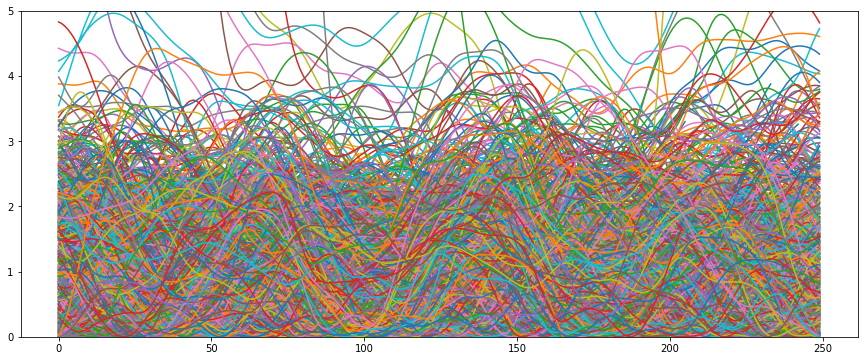

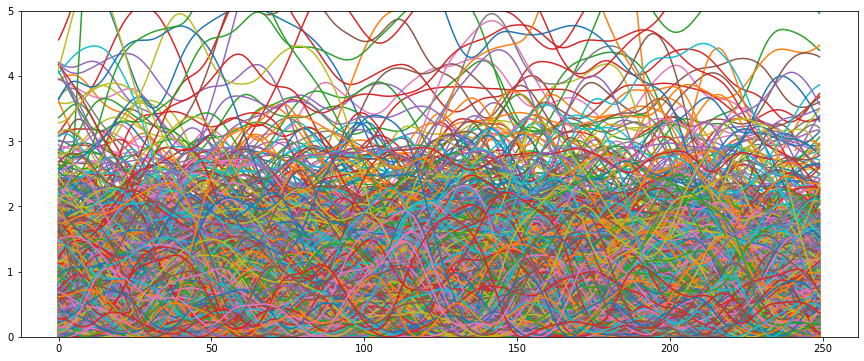

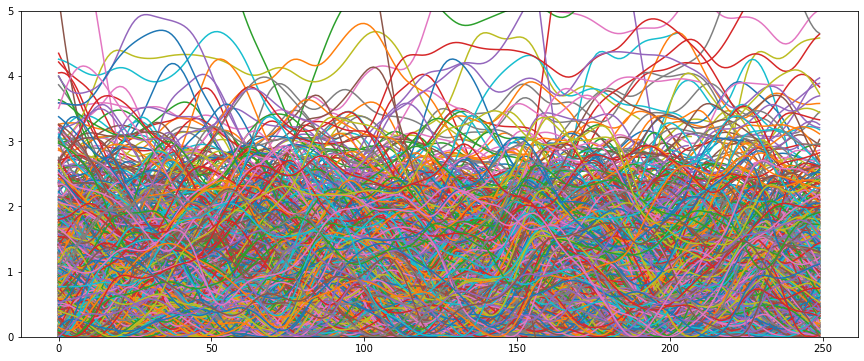

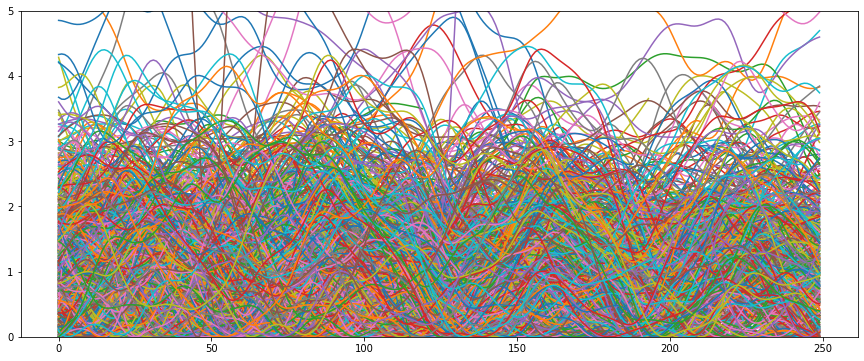

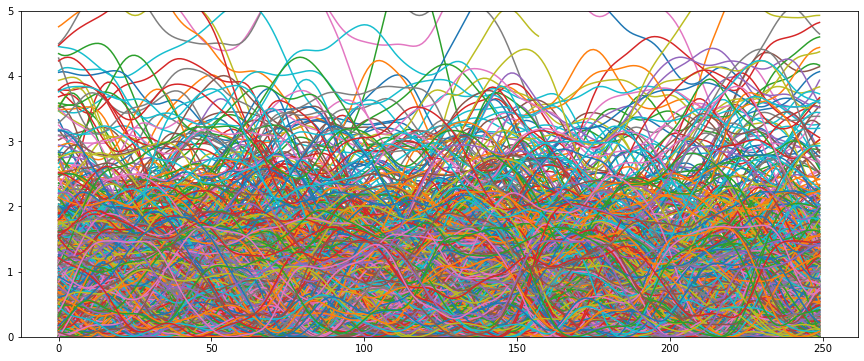

In [39]:
#Write script to pre-process and organize all pert trial into python dict

search_key = ['4mm', '5mm', '8mm', '10mm', 'Wei']#, '45mm']

dict_preprocessed_all = defaultdict(dict)

for i in np.arange(len(search_key)):
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    dict_ridge = dict_ridge_all[search_key[i]]
    dict_ridge_ridge_pos = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge_el_pert_trial = eliminate_pert_trials_from_dict(dict_ridge_ridge_pos)
    dict_ridge_excl_nan_traces = excludeNaNTATraces(dict_ridge_el_pert_trial)
    dict_TA_transpose = transpose_traces_0_360_range(dict_ridge_excl_nan_traces)
    dict_TA_transpose_btw_0_360_der_excluded_without_empty_array = excludeemptyarray(dict_TA_transpose)#dict_TA_transpose_btw_0_360)
    dict_preprocessed_all[search_key[i]] = dict_TA_transpose_btw_0_360_der_excluded_without_empty_array

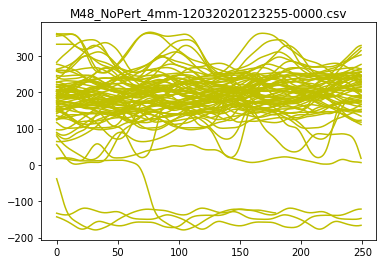

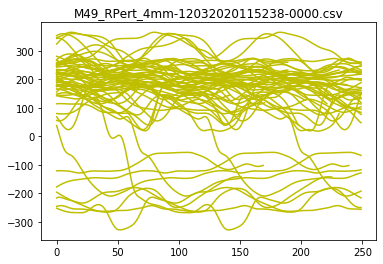

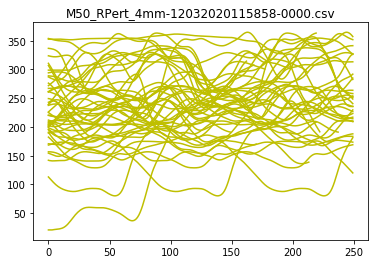

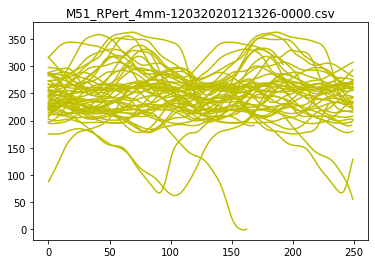

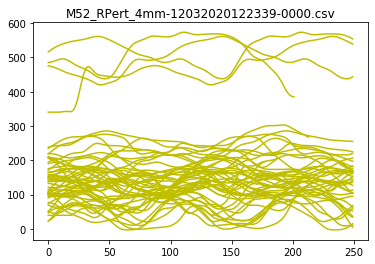

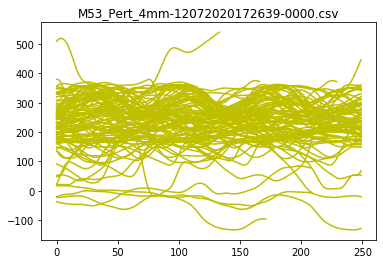

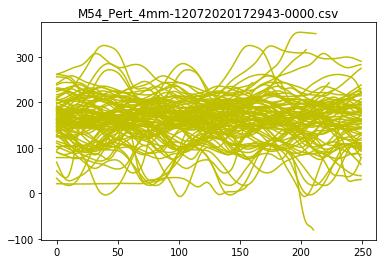

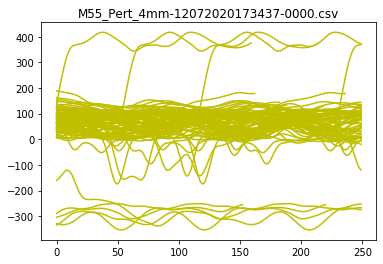

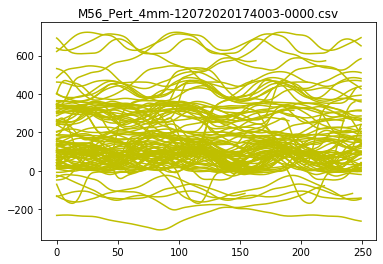

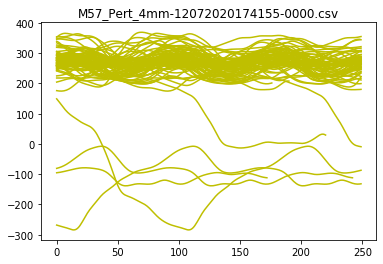

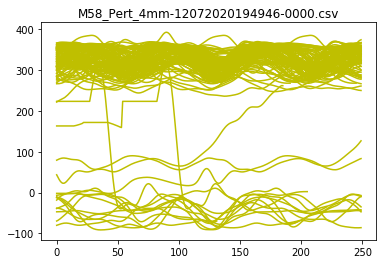

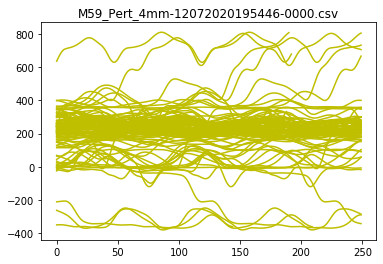

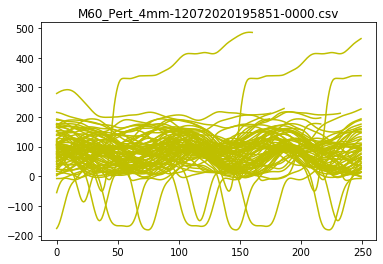

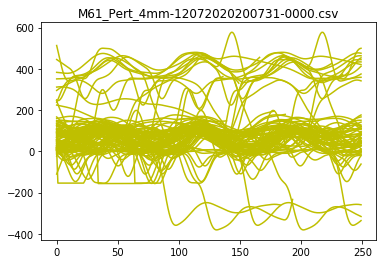

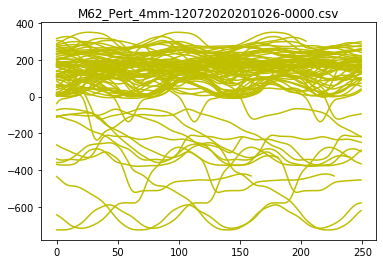

In [40]:
#PLOTS BEFORE PRE-PROCESS wrt R STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][4]
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            plt.plot(TA_traj_wrt_step[j] ,'y')
            plt.title("{i}".format(i = key_list[i]))
            #plt.ylim(200, 300)


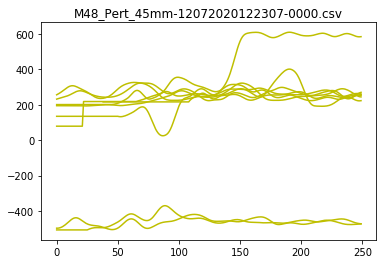

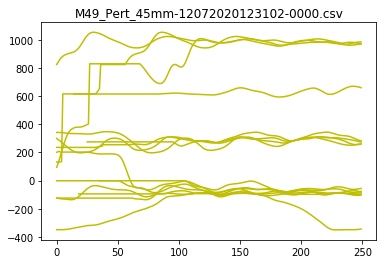

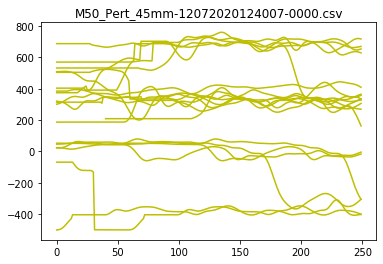

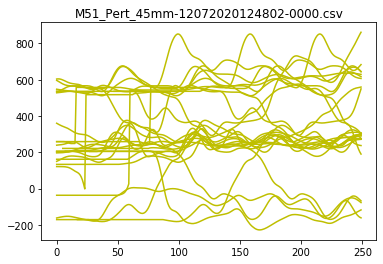

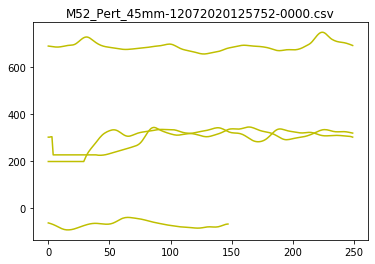

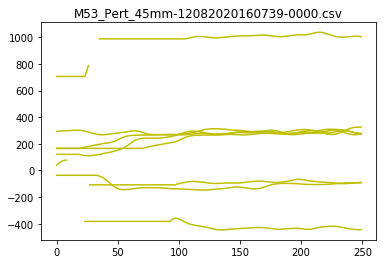

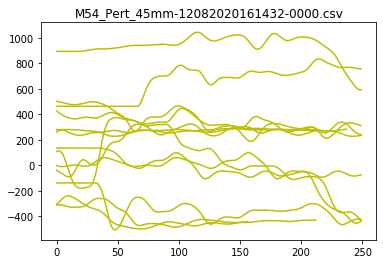

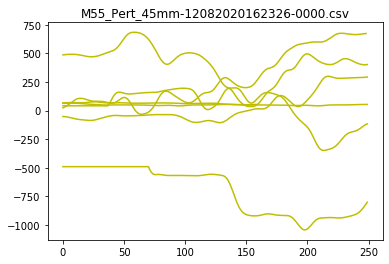

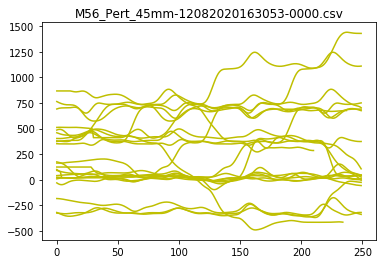

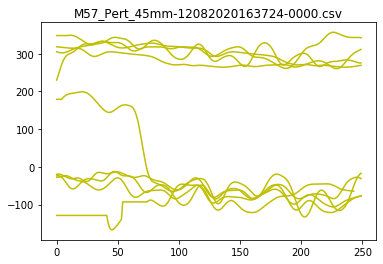

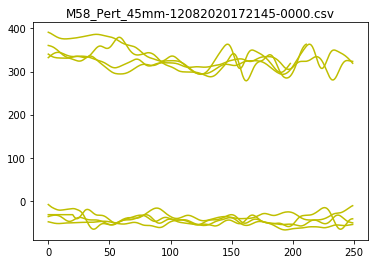

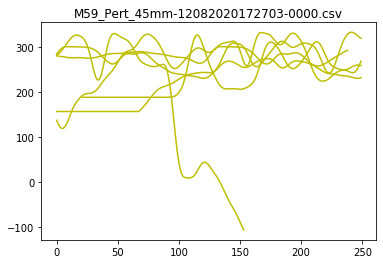

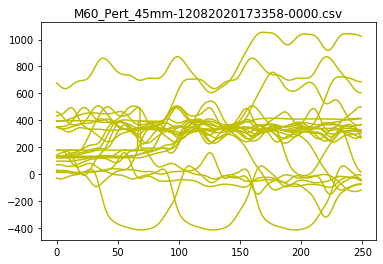

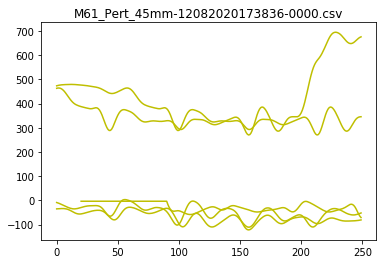

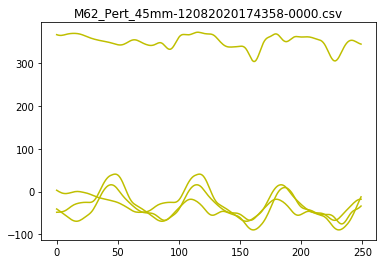

In [41]:
#PLOTS BEFORE PRE-PROCESS wrt R STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['45mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][4]
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            plt.plot(TA_traj_wrt_step[j] ,'y')
            plt.title("{i}".format(i = key_list[i]))
            #plt.ylim(200, 300)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

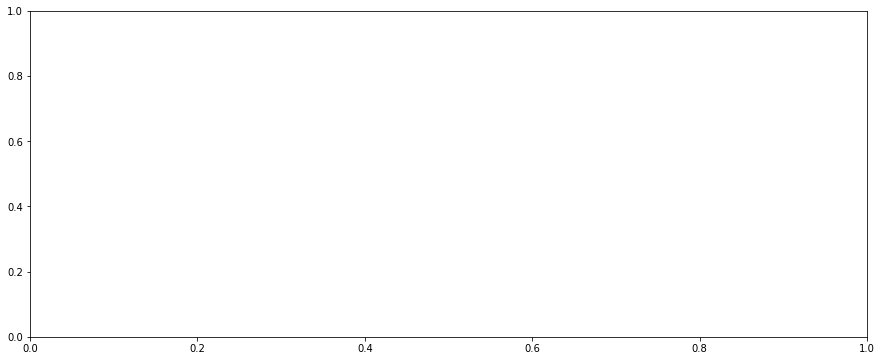

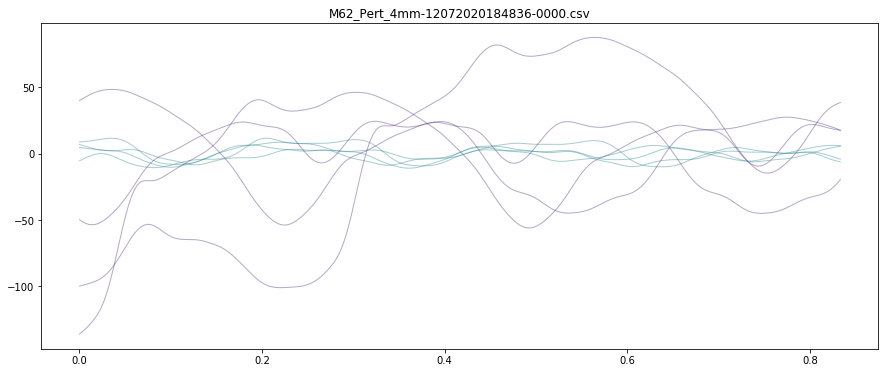

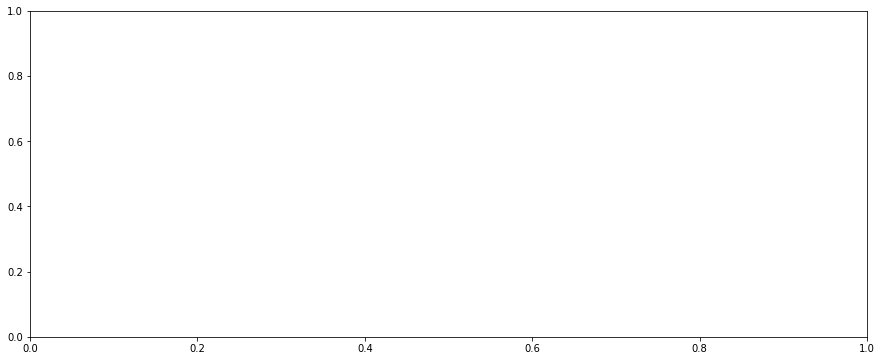

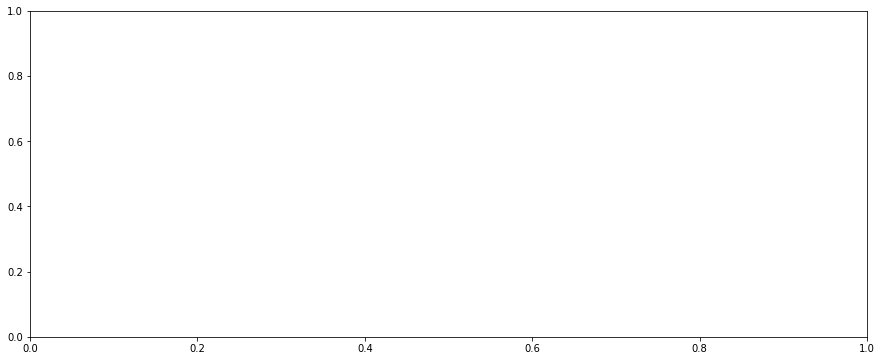

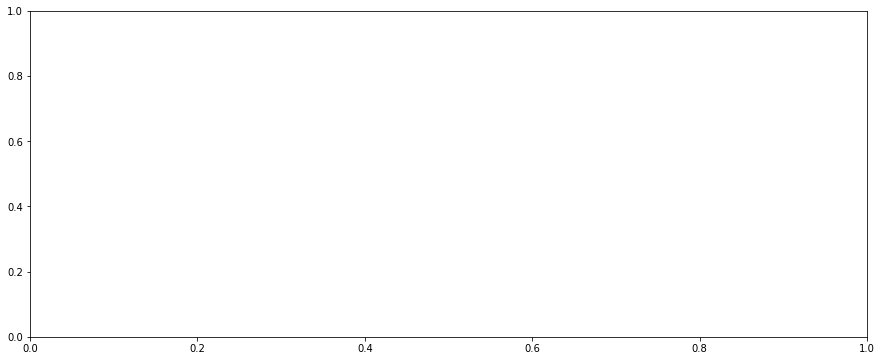

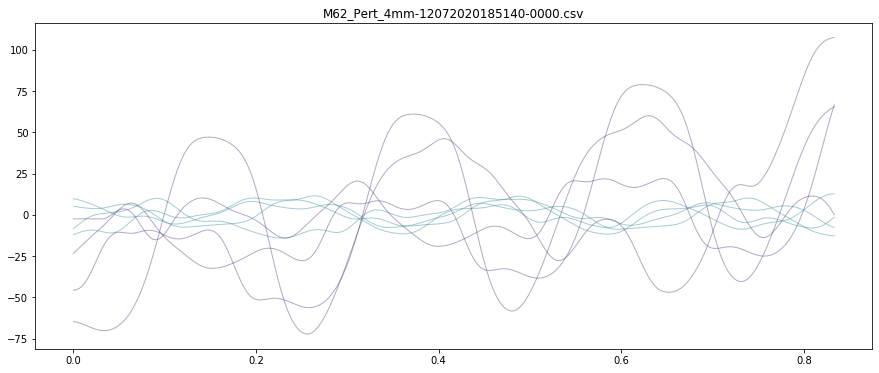

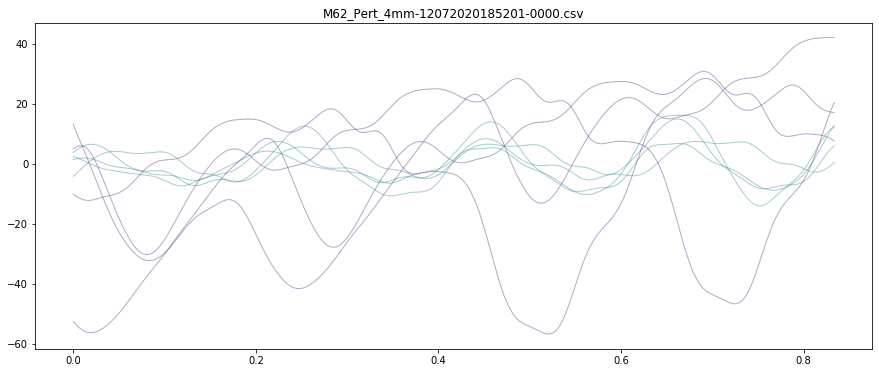

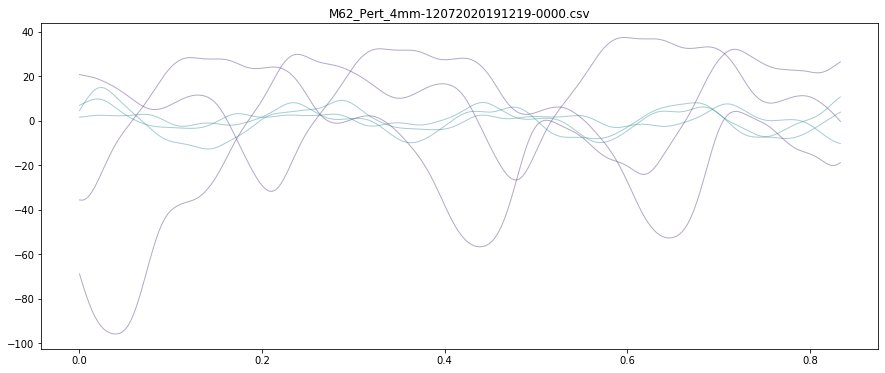

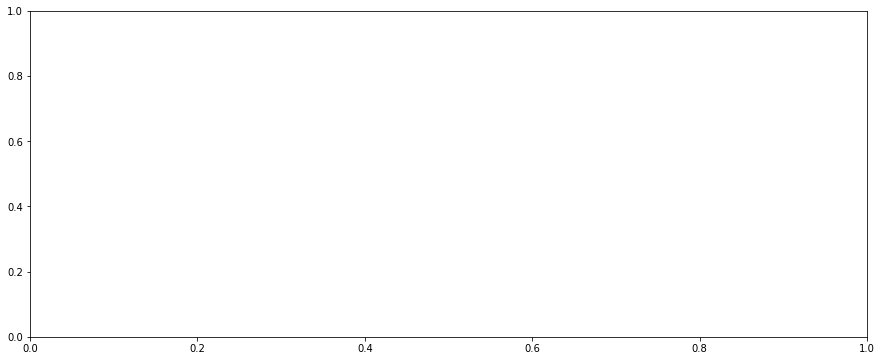

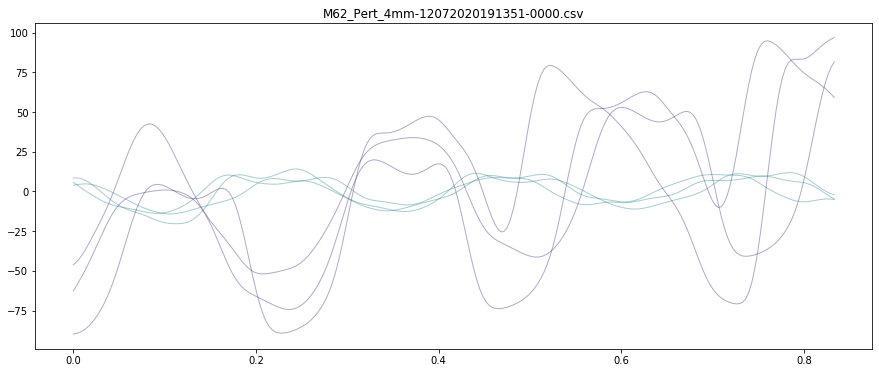

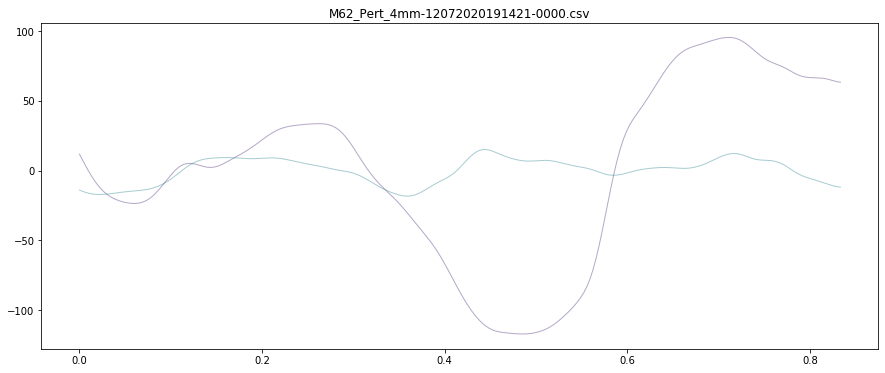

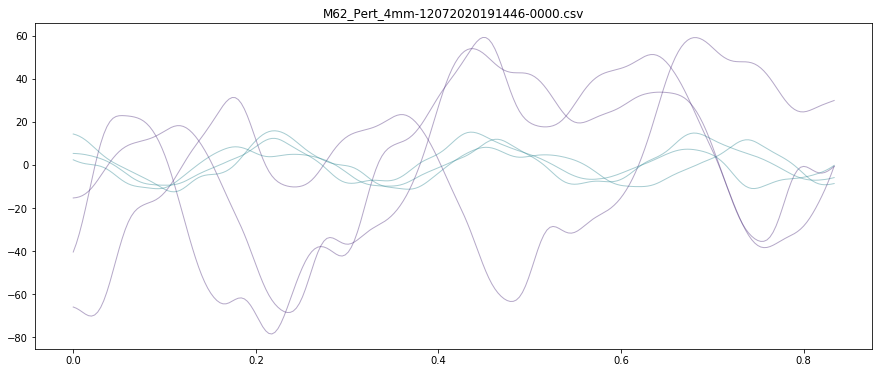

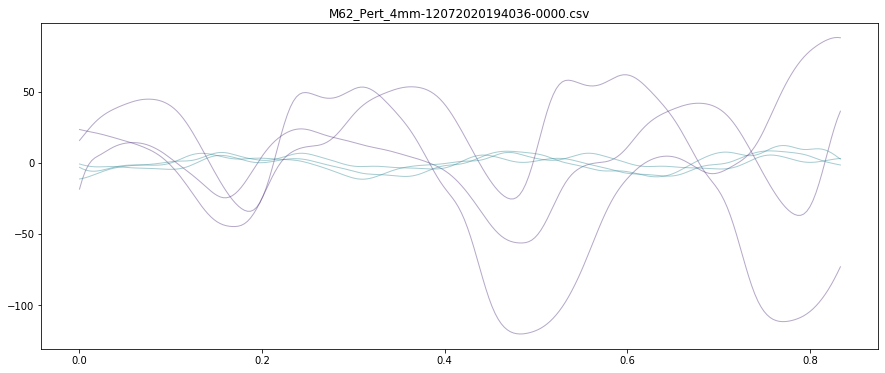

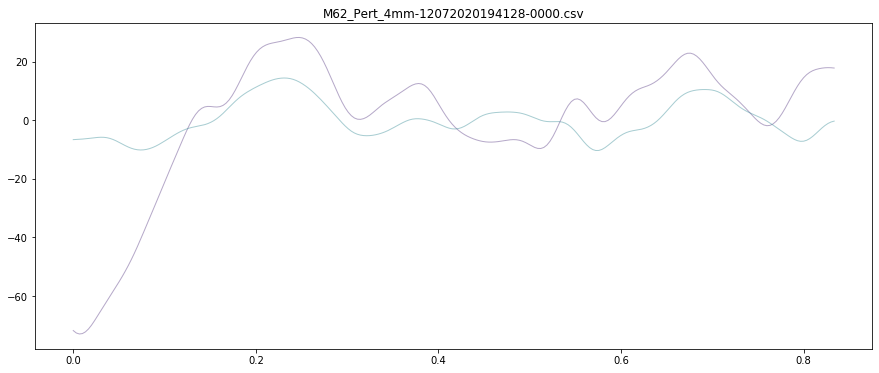

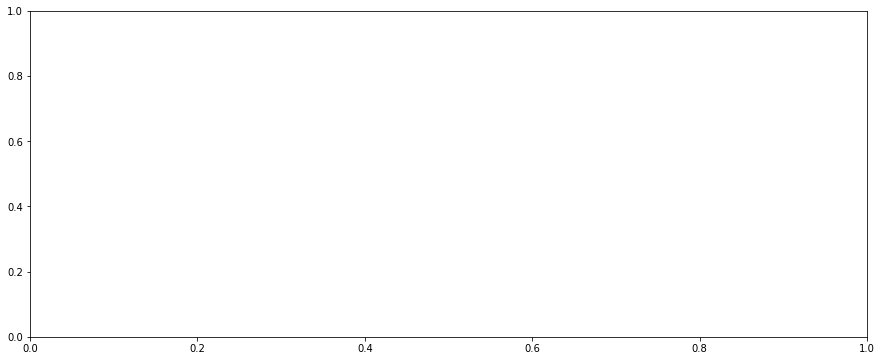

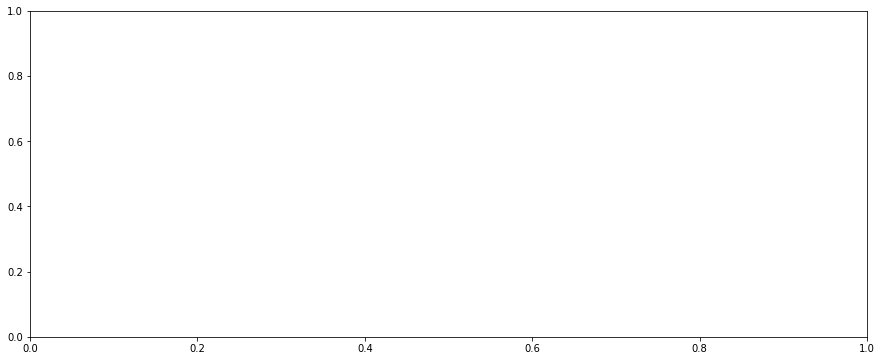

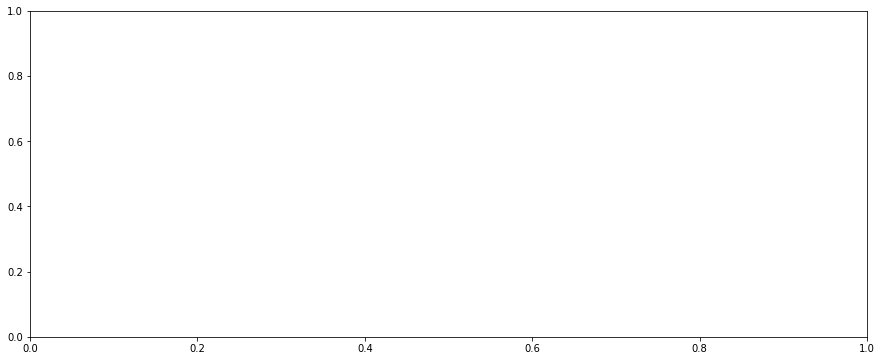

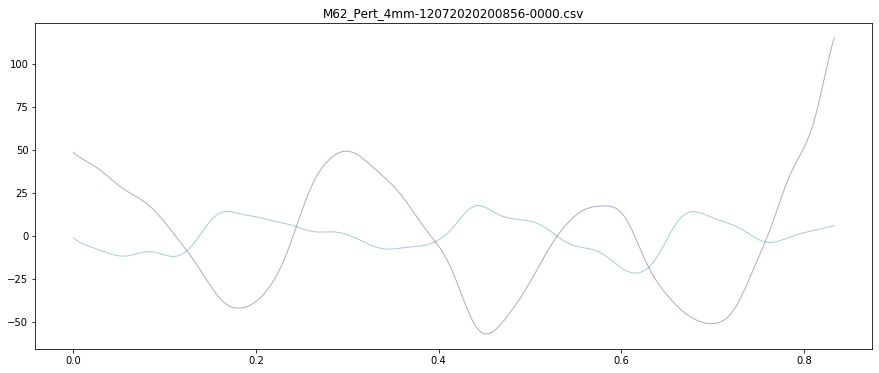

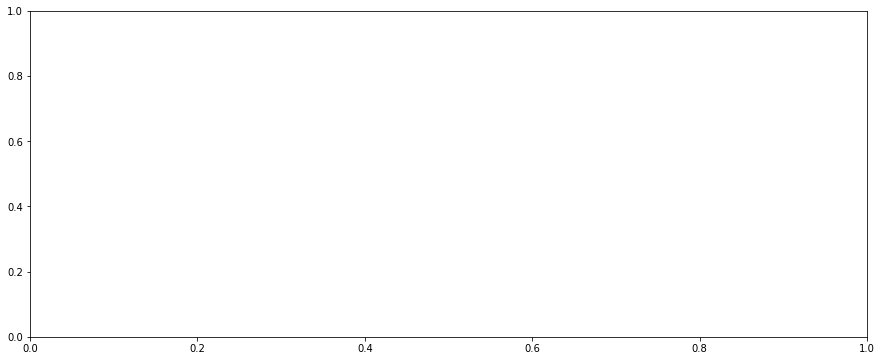

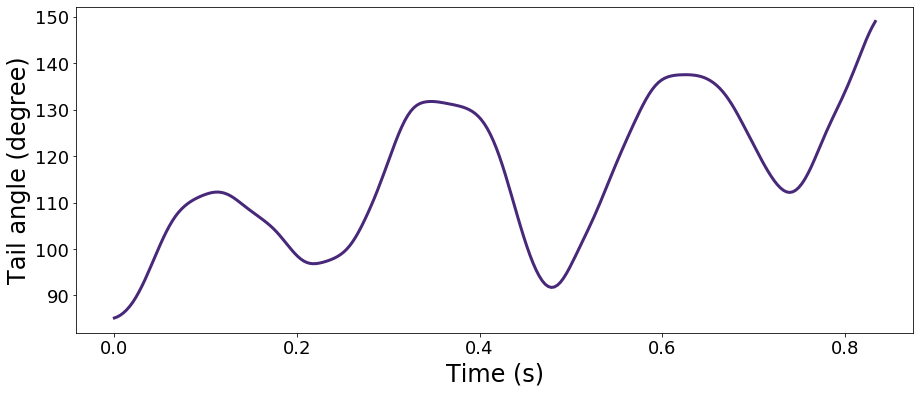

In [42]:
#################################################################PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = [ 'M62']# 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
list_TA_traj = []
for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

        TA_traj_wrt_step = values_list[i][4]
        HA_traj_wrt_step = values_list[i][12]

        clrs = sns.color_palette("viridis", n_colors=8) 
        for j in np.arange(len(TA_traj_wrt_step)):
            if all(TA_traj_wrt_step[j]<220) and all(TA_traj_wrt_step[j]>-50) and len(TA_traj_wrt_step[j])==250:
                x = np.linspace(0, 250/300, 250)
                ax1.plot(x, TA_traj_wrt_step[j] -np.nanmean(TA_traj_wrt_step[j]),color=clrs[0], lw=1, alpha = 0.4)
                ax1.plot(x, HA_traj_wrt_step[j]- np.nanmean(HA_traj_wrt_step[j]) ,color=clrs[3], lw=1, alpha = 0.4)

                plt.title("{i}".format(i = key_list[i]))
                #plt.ylim(200, 300)
                list_TA_traj.append(TA_traj_wrt_step[j])
    ax1.plot(x, np.nanmean(list_TA_traj, axis = 0), color=clrs[0], lw=3, alpha = 1)    
    ax1.set_xlabel('Time (s)', fontsize=24)
    ax1.set_ylabel('Tail angle (degree)', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=18) 
    fig.savefig('out.svg', format='svg', dpi=1200)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


<Figure size 432x288 with 0 Axes>

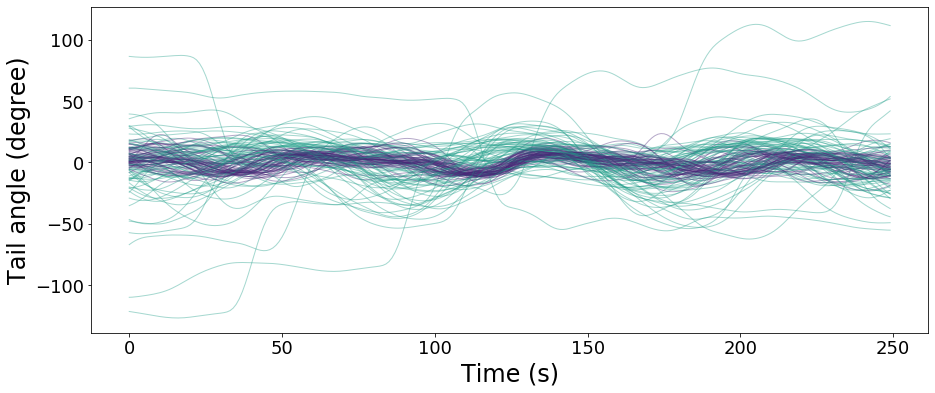

<Figure size 432x288 with 0 Axes>

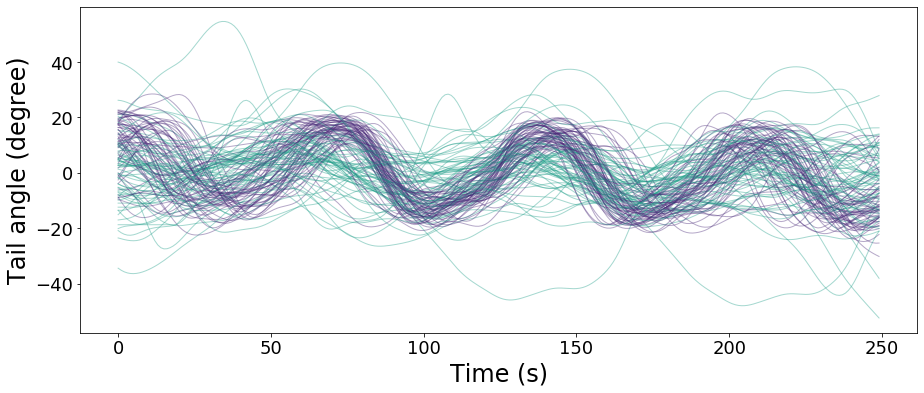

In [43]:
#################################################################PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot hips and tail to visually check they are anti-phase. Look at example M61
MouseID_key = [ 'M61', 'M62']#'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
list_TA_traj = []
for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['8mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][6]
        HA_traj_wrt_step = values_list[i][12]
        clrs = sns.color_palette("viridis", n_colors=8) 
        for j, k in zip(np.arange(len(TA_traj_wrt_step)), np.arange(len(HA_traj_wrt_step))):
            if len(TA_traj_wrt_step[j])==250:# and len(HA_traj_wrt_step[j]) == len(TA_traj_wrt_step[j]):
                x = np.linspace(0, 250/300, 250)
                ax1.plot((TA_traj_wrt_step[j]-np.nanmean(TA_traj_wrt_step[j]))/2 ,color=clrs[4], lw=1, alpha = 0.4)
                ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
                #plt.title("{i}".format(i = key_list[i]))
                #plt.ylim(200, 300)
                list_TA_traj.append(TA_traj_wrt_step[j])
    #ax1.plot(x, np.nanmean(list_TA_traj, axis = 0), color=clrs[0], lw=3, alpha = 1)    
    ax1.set_xlabel('Time (s)', fontsize=24)
    ax1.set_ylabel('Tail angle (degree)', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=18) 
    fig.savefig('out.svg', format='svg', dpi=1200)

In [44]:
def excludeTA_outrange(TA):
    if any(i < -30 or i > 250 for i in TA):
        TA = []
    return TA

In [45]:
#####Compute PSTH no pert trial with mean trace for 45 mm


In [46]:
def return_Mean_STD_forPSTH(array_value_dict):
    mean_array = np.nanmean(array_value_dict, axis = 0)
    STD_array = stats.sem(array_value_dict, nan_policy='omit')
    return mean_array, STD_array

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in remainder
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in remainder


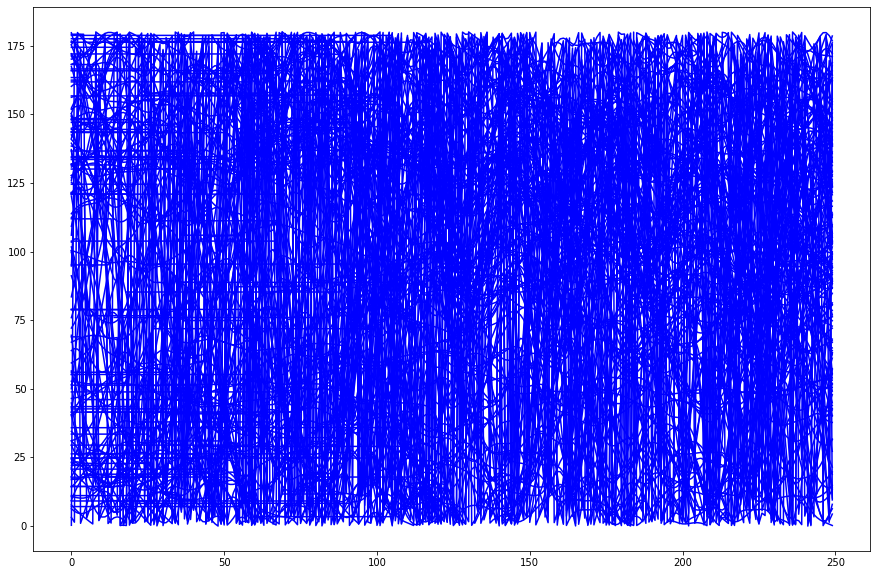

In [47]:
search_key = ['45mm']
MouseID_key = [ 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
clrs = sns.color_palette("husl", 4)
label_strings = ['45mm Tail', '5mm Tail', '8mm Tail', '10mm Tail']



fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
list_TA_traj = []
list_HA_traj = []
mean_small_list = []
std_small_list = []
mean_big_list = []
std_big_list = []
for k in np.arange(len(search_key)):
    for i in np.arange(len(MouseID_key)):
        dict_ridge_Xwidth = dict_ridge_all[search_key[k]]
        dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_list = list(dict_ridge_XwidthXmouseID.values())
        key_list = list(dict_ridge_XwidthXmouseID.keys()) 
        #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

        for l in np.arange(len(key_list)):
            TA_traj_wrt_step = values_list[l][4]
            HA_traj_wrt_step = values_list[l][12]
            for j,s in zip(np.arange(len(TA_traj_wrt_step)), np.arange(len(HA_traj_wrt_step))):
                if len(TA_traj_wrt_step[j])==250:
                    Tail_to_append = TA_traj_wrt_step[j]%180
                    list_TA_traj.append(Tail_to_append)
                    ax1.plot(Tail_to_append, 'blue')
                if len(HA_traj_wrt_step[s])==250:
                    Hip_to_append = abs(HA_traj_wrt_step[s])%180#-np.nanmean(TA_traj_wrt_step[j])
                    list_HA_traj.append(Hip_to_append)
                    #ax1.plot(Hip_to_append, 'red')
mean_big, std_big = return_Mean_STD_forPSTH(list_TA_traj)
mean_small, std_small = return_Mean_STD_forPSTH(list_HA_traj)
mean_big_list.append(mean_big)
std_big_list.append(std_big)
mean_small_list.append(mean_small)
std_small_list.append(std_small)


In [48]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings, clrs):
    label_strings = ['45mm']#, '45mm', '45mm', '45mm', '45mm']#, '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            print(len(mean_array))
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][50:200][92:152]
            std_array[i] = std_array[i][50:200][92:152]
            x = np.linspace(0, len(mean_array[i])/0.3, len(mean_array[i]))
            
            ax.plot(x, mean_array[i], c=clrs, label = label_strings[0], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                             alpha=0.3, facecolor=clrs)
            #ax.legend(loc="lower left", prop={'size': 12})
            ax.set_xlabel('Time (ms)', fontsize=18)
            ax.set_ylabel('Angle (degree)', fontsize=18)
            #ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
            #ax.axvline(125/300,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax


1
1


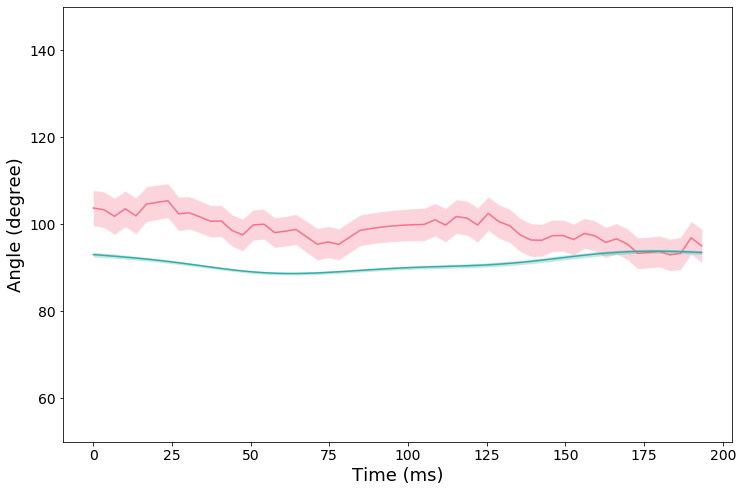

In [49]:
#CONTRA
clrs = sns.color_palette("husl", 4)
clrs_big = clrs[0]
clrs_small = clrs[2]
_, ax = plt.subplots(figsize=(12, 8))
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
ls_param_bl = '-'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl, clrs_big) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl, clrs_small)  
# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

#plt.xlim(50/300, 200/300)
plt.ylim(50, 150)
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [50]:

#####Compute scatterplot speed VS uncompensated momentum hips-tail


In [51]:
def compute_amlpit(vector):
    ampl = max(vector[92:132])-min(vector[92:132])
    return ampl

In [52]:
def forward_speed(comy_traj):
    scaling_pixels = 1#4/5#, 5/6, 8/10, 10/12, 45/60]#to convert pixel unit to mm
    comy_traj_seg = comy_traj
#     comy_traj_nonNaN = comy_traj[np.logical_not(numpy.isnan(comy_traj))]
#     comy_traj_seg = comy_traj_nonNaN
    #Compute first and last nonNan value from CentY and velocity
    centY_nonNan_first = comy_traj_seg[0]
    centY_nonNan_last = comy_traj_seg[-1]
    vel_centY = ((centY_nonNan_last-centY_nonNan_first)*scaling_pixels)/(((len(comy_traj_seg))*(1/300))*1000)#scaling m/s
    return vel_centY

In [53]:
def normalize_by_min(arr):
    arr = np.array(arr)  # convert list to numpy array
    if arr.ndim == 0:
        return arr  # return the input scalar
    elif arr.ndim == 1:
        return [x / min(arr) for x in arr]  # normalize each element by the min value
    else:
        min_vals = np.apply_along_axis(np.min, 1, arr)
        normalized_arr = arr / min_vals[:, np.newaxis]
        return normalized_arr.tolist()


In [54]:
import statistics

def calculate_z_scores(lst):
    mean = statistics.mean(lst)
    stdev = statistics.stdev(lst)
    z_scores = [(x - mean) / stdev for x in lst]
    return z_scores


In [55]:
def dict_structure(dictionary):
    # Check if input is a dictionary
    if not isinstance(dictionary, dict):
        return "Input is not a dictionary"

    # Create an empty dictionary to store the structure
    structure = {}

    # Loop through the dictionary and check the type of each value
    for key, value in dictionary.items():
        if isinstance(value, dict):
            # If the value is another dictionary, recursively call the function
            structure[key] = dict_structure(value)
        else:
            # Otherwise, store the type of the value
            structure[key] = type(value).__name__

    return structure

In [56]:
def delete_lowest_value(d):
    for key, value in d.items():
        min_value = min(value, key=lambda x: x[1])[1]
        d[key] = [x for x in value if x[1] != min_value] if len(value) > 1 else value
    return {k: v for k, v in d.items() if v}


In [57]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_regression_singleMouseID(dict_data):
    # Initialize lists to store x and y values
    x_values = []
    y_values = []

    # Loop over each key in the dictionary
    for key in dict_data:
        # Loop over each sub-key in the dictionary
        for dataset in dict_data[key]:
            # Get the x and y values for this dataset
            x, y = dict_data[key][dataset]
            # Add x and y values to the lists
            x_values.extend(x)
            y_values.extend(y)

            # Scatter plot
            plt.scatter(x, y, label=f'{key}_{dataset}')

            # Linear regression
            model = LinearRegression()
            model.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))
            coef = model.coef_[0][0]
            intercept = model.intercept_[0]
            equation = f'y = {coef:.20f}x + {intercept:.20f}'
            plt.plot(x, model.predict(np.array(x).reshape(-1, 1)))

            # Pearson correlation coefficient and p-value
            corr, pval = pearsonr(x, y)
            if pval < 0.05:
                significance = 'significant'
            else:
                significance = 'not significant'
            print(f'{key}_{dataset}: correlation coefficient={corr:.2f}, p-value={pval:.2f} ({significance})')

    # Pearson correlation coefficient and p-value for the pooled data
    corr, pval = pearsonr(x_values, y_values)
    if pval < 0.05:
        significance = 'significant'
    else:
        significance = 'not significant'
    print(f'Pooled data: correlation coefficient={corr:.2f}, p-value={pval:.2f} ({significance})')

    # Add legend and labels
    plt.legend()
    plt.xlabel('uncompensated mom')
    plt.ylabel('speed')
    plt.show()


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=T

In [58]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_regression_alldata_norm_noplots(dict_data, sk):#, colors):
#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
    # Initialize lists to store x and y values
    x_values = []
    y_values = []
    labels = []  # initialize a list to store labels for each first key
    colors = []  # initialize a list to store colors for each first key

    # Define a color palette for the keys
    cud_colors = sns.color_palette("husl", 5)

    # Loop over each key in the dictionary
    for i, key in enumerate(dict_data):
        # Initialize lists to store normalized x and y values for this key
        key_x = []
        key_y = []

        # Loop over each sub-key in the dictionary
        for dataset in dict_data[key]:
            # Get the x and y values for this dataset
            x, y = dict_data[key][dataset]
            # Normalize the x and y values
            x_norm = (x - np.mean(x)) / np.std(x)
            y_norm = (y - np.mean(y)) / np.std(y)
            # Add normalized x and y values to the key-specific lists
            key_x.extend(x_norm)
            key_y.extend(y_norm)

            # Scatter plot
#             plt.scatter(x_norm, y_norm, label=f'{key}_{dataset}', color=cud_colors[sk])

        # Linear regression for this key
        model = LinearRegression()
        model.fit(np.array(key_x).reshape(-1, 1), np.array(key_y).reshape(-1, 1))
        coef = model.coef_[0][0]
        intercept = model.intercept_[0]
        equation = f'y = {coef:.20f}x + {intercept:.20f}'
#         plt.plot(key_x, model.predict(np.array(key_x).reshape(-1, 1)), color=cud_colors[sk])

        # Pearson correlation coefficient and p-value for this key
        corr, pval = pearsonr(key_x, key_y)
    return corr


In [59]:
def plot_regression_alldata_norm(dict_data, sk, colors, ax=None):
    if ax is None:
        ax = plt.gca()

    # Initialize lists to store x and y values
    x_values = []
    y_values = []
    labels = []  # initialize a list to store labels for each first key

    # Define a color palette for the keys
    cud_colors = sns.color_palette("husl", len(colors))

    # Loop over each key in the dictionary
    for i, key in enumerate(dict_data):
        # Initialize lists to store normalized x and y values for this key
        key_x = []
        key_y = []

        # Loop over each sub-key in the dictionary
        for j, dataset in enumerate(dict_data[key]):
            # Get the x and y values for this dataset
            x, y = dict_data[key][dataset]
            # Normalize the x and y values
            x_norm = (x - np.mean(x)) / np.std(x)
            y_norm = (y - np.mean(y)) / np.std(y)
            # Add normalized x and y values to the key-specific lists
            key_x.extend(x_norm)
            key_y.extend(y_norm)

            # Scatter plot
            ax.scatter(x_norm, y_norm, label=f'{key}_{dataset}', color=colors[sk])

        # Linear regression for this key
        model = LinearRegression()
        model.fit(np.array(key_x).reshape(-1, 1), np.array(key_y).reshape(-1, 1))
        coef = model.coef_[0][0]
        intercept = model.intercept_[0]
        equation = f'y = {coef:.20f}x + {intercept:.20f}'
        ax.plot(key_x, model.predict(np.array(key_x).reshape(-1, 1)), color=colors[sk])

        # Pearson correlation coefficient and p-value for this key
        corr, pval = pearsonr(key_x, key_y)
        if pval < 0.05:
            significance = 'significant'
        else:
            significance = 'not significant'
        print(f'{key}: correlation coefficient={corr:.2f}, p-value={pval:.2f} ({significance})')

        # Add key-specific x and y values to the pooled lists
        x_values.extend(key_x)
        y_values.extend(key_y)

        # Add key to the list of labels
        labels.append(key)

    # Pearson correlation coefficient and p-value for the pooled data
    corr, pval = pearsonr(x_values, y_values)
    if pval < 0.05:
        significance = 'significant'
    else:
        significance = 'not significant'
    print(f'Pooled data: correlation coefficient={corr:.2f}, p-value={pval:.2f} ({significance})')

    # Add legend and labels
    ax.legend(labels=labels)
    ax.set_xlabel('uncompensated mom (normalized)')
    ax.set_ylabel('speed (normalized)')
    return corr


In [60]:
def cosine_similarity(a, b):
    normalized_a = a / math.sqrt(a**2 + b**2)
    normalized_b = b / math.sqrt(a**2 + b**2)
    similarity = normalized_a * normalized_b
    return similarity


In [61]:
def calculate_difference(value1, value2):
    difference = value2 - value1
    return difference


In [62]:
def calculate_normalized_difference(value1, value2):
    numerator = value2 - value1
    denominator = value2 + value1
    normalized_difference = numerator / denominator
    return normalized_difference


In [63]:
def calculate_normalized_similarity(value1, value2):
    numerator = value2 - value1
    denominator = value2 + value1
    normalized_difference = numerator / denominator
    normalized_similarity = 1 - abs(normalized_difference)
    return normalized_similarity


In [64]:
def calculate_similarity(value1, value2):
    similarity = 1 - abs(value2 - value1)
    return similarity


In [65]:
def similarity(value1, value2):
    distance = math.sqrt((value1 - value2) ** 2)
    similarity = 1 / (1 + distance)
#     print(distance)
    return similarity

In [66]:
def compute_ratio(a1, a2):
    if a1 > a2:
        ratio = a2 / a1
    elif a2 > a1:
        ratio = a1 / a2
    else:
        ratio = 1.0  # Equal values, ratio is 1.0

    return ratio


In [67]:
def COMx_rel_dist(array, j):
    dist_from_edge = [2, 2.5, 4, 5, 2]
    scaling_pixels = [4/5, 5/6, 8/10, 10/12, 45/60]#to convert pixel unit to mm
#     cent_dist_traj_nonNaN = array[np.logical_not(numpy.isnan(array))]
    cent_dist_from_edge_traj = (array)/dist_from_edge[j]
    return np.nanmean(cent_dist_from_edge_traj), cent_dist_from_edge_traj

In [68]:
from typing import Dict, List, Tuple
from collections import defaultdict

def extract_uncompMom_COMx(dict_ridge_all: Dict[str, Dict[str, Tuple]], 
                            range_of_interest: List[int], search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    COMx_idx = 14
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)
    lineopacity = [1, 0.8, 0.5, 0.1]


#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
#     ax.axvline(range_of_interest[0],0,360, color = 'red')
#     ax.axvline(range_of_interest[1],0,360, color = 'red')    
    for sk in np.arange(len(search_key)):
        COMx_mean_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        step_list = []
        Tail_Hips_ratio_list = []

        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key[sk]]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
#             step_list = []
            for i in range(len(key_list)):
#                 step_list = []
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMx_traj = COMX_traj_wrt_step[j][COMx_idx]
#                     COMx_traj_nonNAN = COMx_traj[np.logical_not(numpy.isnan(COMx_traj))]
                    if len(tail_traj)==250 and all(tail_traj > -100) and len(hip_traj)==250 \
                    and len(COMx_traj)==250 and all(COMx_traj<5):
                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
                        uncomp_mom = (TA_momentum+HA_momentum)
                        ##ang mom
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest[0]:range_of_interest[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest[0]:range_of_interest[1]]))
                        uncomp_mom_pre_swing = (np.nanmean(uncomp_mom[range_of_interest[0]:range_of_interest[1]]))
#                         print(uncomp_mom_pre_swing)
                        ##tail/hips similarity 
                        Tail_Hips_ratio = calculate_similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)
                        #COMx rel dist
                        COMx_traj_nonNAN_mean, COMx_traj_rel = COMx_rel_dist(COMx_traj, sk)
                        #COMx rel dist wrt step
                        CentX_traj_rel_pre_swing = np.nanmean(COMx_traj_rel[range_of_interest[0]:range_of_interest[1]])#(COMx_traj_rel[range_of_interest[0]]-COMx_traj_rel[range_of_interest[1]])
                        
                        if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(CentX_traj_rel_pre_swing):# and CentX_traj_rel_pre_swing<0:
#                         and np.nanmean(COMx_traj_rel[125:135]<0.5):
                            COMx_mean_list.append(CentX_traj_rel_pre_swing)#COMx_traj_nonNAN_mean)
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            uncomp_mom_list.append(uncomp_mom)
                            step_list.append(COMx_traj)
                            Tail_Hips_ratio_list.append(Tail_Hips_ratio)
#         print(len(step_list))
#         ax.plot(np.nanmean(step_list, axis = 0), color = 'g', alpha = lineopacity[sk])


        dict_uncompMom_speed[search_key[sk]][mouse_id] = [(COMx_mean_list), \
                                                      uncomp_mom_pre_swing_list]#uncomp_mom_pre_swing_list]
        dict_TAMom_speed[search_key[sk]][mouse_id] = [(tail_angmom_list), \
                                                      (COMx_mean_list)]
        dict_HAMom_speed[search_key[sk]][mouse_id] = [(hip_angmom_list), \
                                                      (COMx_mean_list)]
#     ax.plot(np.nanmean(tail_angmom_list, axis = 0) ,color = 'b')
#     ax.plot(np.nanmean(hip_angmom_list, axis = 0), color = 'r')
#     print(len(uncomp_mom_pre_swing_list))
    
    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed#, np.nanmean(step_list, axis = 0)


In [69]:
def extract_speed_COMx(dict_ridge_all: Dict[str, Dict[str, Tuple]], 
                            range_of_interest: List[int], search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    COMx_idx = 14
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)
    lineopacity = [1, 0.8, 0.5, 0.1]
  
    for sk in np.arange(len(search_key)):
        COMx_mean_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        step_list = []
        fwd_speed_list = []

        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key[sk]]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
            for i in range(len(key_list)):
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMx_traj = COMX_traj_wrt_step[j][COMx_idx]
                    COMY_traj_wrt_step = COMX_traj_wrt_step[j][1]
                    if len(tail_traj)==250 and all(tail_traj > -100) and len(hip_traj)==250 \
                    and len(COMx_traj)==250 and all(COMx_traj<5):
                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
                        uncomp_mom = (TA_momentum+HA_momentum)
                        ##ang mom
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest[0]:range_of_interest[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest[0]:range_of_interest[1]]))
                        uncomp_mom_pre_swing = (np.nanmean(uncomp_mom[range_of_interest[0]:range_of_interest[1]]))
                        #fwd speed
                        COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
                        fwd_traj_cntrd0 = COMY - COMY[0]
                        fwd_speed = forward_speed(fwd_traj_cntrd0)
                        #COMx rel dist
                        COMx_traj_nonNAN_mean, COMx_traj_rel = COMx_rel_dist(COMx_traj, sk)
                        #COMx rel dist wrt step
                        CentX_traj_rel_pre_swing = np.nanmean(COMx_traj_rel[range_of_interest[0]:range_of_interest[1]])#COMx_traj_rel[range_of_interest[0]]-COMx_traj_rel[range_of_interest[1]]
#                         fwd_speed = np.nanmean(COMx_traj_rel[range_of_interest[0]:range_of_interest[1]])
                        
                        if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(CentX_traj_rel_pre_swing) \
                        and not math.isnan(fwd_speed) and np.nanmean(COMx_traj_rel)>0.4:
                            fwd_speed_list.append(fwd_speed)
                            COMx_mean_list.append(CentX_traj_rel_pre_swing)
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            uncomp_mom_list.append(uncomp_mom)
                            step_list.append(COMx_traj)



        dict_uncompMom_speed[search_key[sk]][mouse_id] = [COMx_mean_list, \
                                                      (fwd_speed_list)]
        dict_TAMom_speed[search_key[sk]][mouse_id] = [(tail_angmom_list), \
                                                      (COMx_mean_list)]
        dict_HAMom_speed[search_key[sk]][mouse_id] = [(hip_angmom_list), \
                                                      (COMx_mean_list)]

    
    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed


In [70]:
from typing import Dict, List, Tuple
from collections import defaultdict

def extract_uncompMom_speed(dict_ridge_all: Dict[str, Dict[str, Tuple]], 
                            range_of_interest: List[int], search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
#     MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)

#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
#     ax.axvline(range_of_interest[0],0,360, color = 'red')
#     ax.axvline(range_of_interest[1],0,360, color = 'red')    
    for search_key in search_key:
        fwd_speed_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        step_list = []
        Tail_Hips_ratio_list = []

        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
            for i in range(len(key_list)):
                step_list = []
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMY_traj_wrt_step = COMX_traj_wrt_step[j][1]
                    if len(tail_traj) == 250 and all(tail_traj > -100) and len(hip_traj) == 250:
                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
                        uncomp_mom = (HA_momentum+TA_momentum)
                        ##ang mom
                        uncomp_mom_pre_swing = abs(np.nanmean(np.nanmean(uncomp_mom[range_of_interest[0]:range_of_interest[1]])))
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest[0]:range_of_interest[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest[0]:range_of_interest[1]]))
#                         uncomp_mom_pre_swing = normalize_by_min(HA_momentum_pre_swing-TA_momentum_pre_swing)
                        ##tail/hips similarity 
                        Tail_Hips_ratio = calculate_similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)
        
                        #fwd speed tot trial
#                         COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
#                         fwd_traj_cntrd0 = COMY - COMY[0]
#                         fwd_speed = forward_speed(fwd_traj_cntrd0)
                        #fwd speed during time bin
                        COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
                        fwd_traj_cntrd0 = COMY[range_of_interest[0]:range_of_interest[1]] - COMY[0]
#                         print(fwd_traj_cntrd0)
                        if len(fwd_traj_cntrd0):
                            fwd_speed = forward_speed(fwd_traj_cntrd0)
                        if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(fwd_speed):
                            fwd_speed_list.append(fwd_speed)
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            uncomp_mom_list.append(uncomp_mom)
                            step_list.append(step_traj)
                            Tail_Hips_ratio_list.append(Tail_Hips_ratio)

        dict_uncompMom_speed[search_key][mouse_id] = [tail_angmom_list,#tail_angmom_list, #(fwd_speed_list),# \
                                                      hip_angmom_list]#hip_angmom_list]#uncomp_mom_pre_swing_list]
        dict_TAMom_speed[search_key][mouse_id] = [(tail_angmom_list), \
                                                      (fwd_speed_list)]
        dict_HAMom_speed[search_key][mouse_id] = [(hip_angmom_list), \
                                                      (fwd_speed_list)]
#     ax.plot(np.nanmean(tail_angmom_list, axis = 0) ,color = 'b')
#     ax.plot(np.nanmean(hip_angmom_list, axis = 0), color = 'r')
#     print(len(uncomp_mom_pre_swing_list))
#    ax.plot(np.nanmean(step_list, axis = 0), color = 'g')
    
    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed#, np.nanmean(step_list, axis = 0)


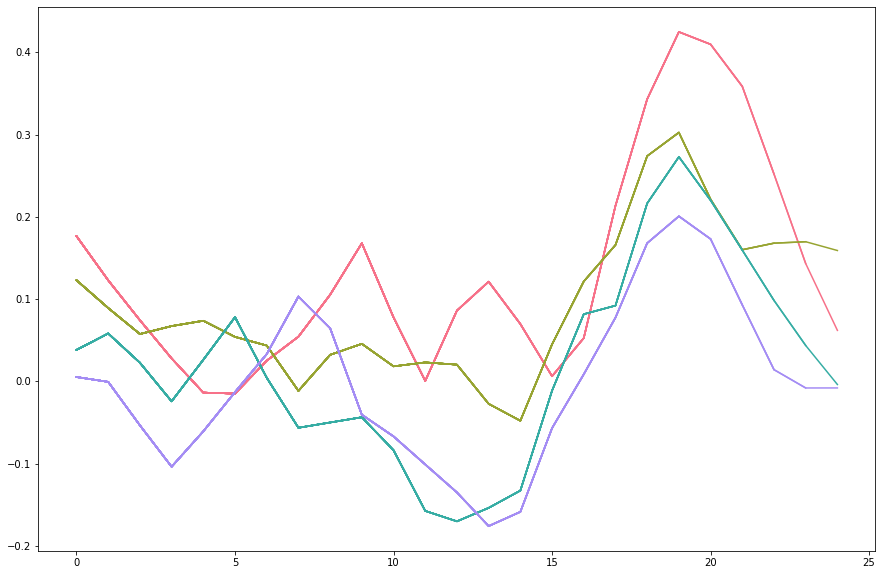

In [71]:
# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 3
search_key = ['4mm', '5mm', '8mm', '10mm']#, 'Wei']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the legend handles and labels
handles = []
labels = []
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
for sk, color in zip(range(len(search_key)), colors):
    list_c_uMOM = []
    list_c_TAMOM = []
    list_c_HAMOM = []
    for i in range(85, 160, window_width):
        range_of_interest = [i, i+window_width]#, i+wl*window_width, i+window_width+wl*window_width]
        dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed = extract_uncompMom_speed(dict_ridge_all, range_of_interest, \
                                                                                           [search_key[sk]], MouseID_key)
        # Do something with dict_uncompMom_speed for this range of interest
        c_TAMOM = plot_regression_alldata_norm_noplots(dict_TAMom_speed, sk)
        c_HAMOM = plot_regression_alldata_norm_noplots(dict_HAMom_speed, sk)
        c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, sk)

        list_c_uMOM.append(c_uMOM)
        list_c_TAMOM.append(c_TAMOM)
        list_c_HAMOM.append(c_HAMOM)
#         ax1.plot(list_c_HAMOM, color='b')
        ax1.plot(list_c_uMOM, color=color)
#         ax1.set_ylim([-0.3, 0.5])
#     # Add the plot handle and label to the legend
#     handles.append(plt.plot([], [], color=color)[0])
#     labels.append(search_key[sk])

# # Add the legend to the plot
# plt.legend(handles=handles, labels=labels)
fig.savefig('cra.svg', format='svg', dpi=1200)

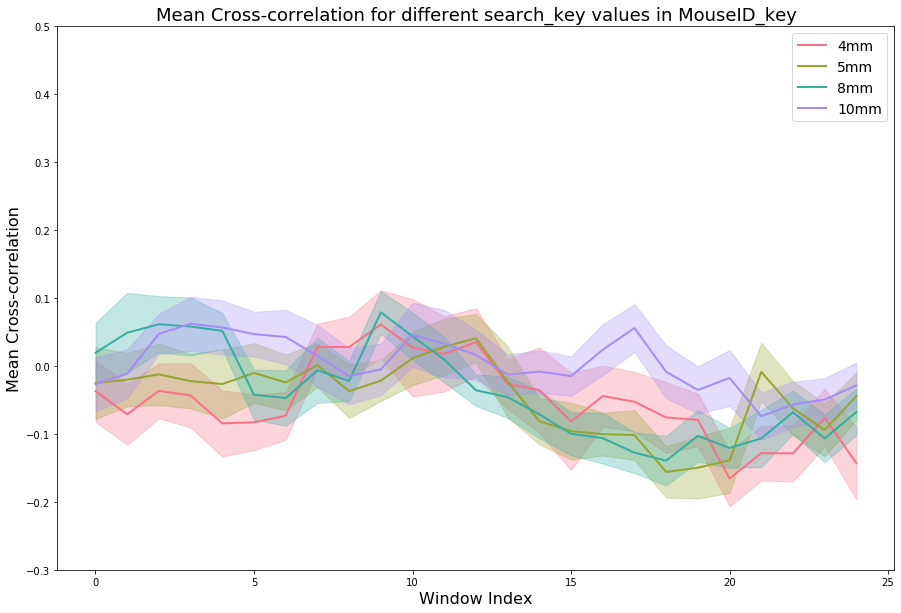

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot cross-correlation time series
colors = sns.color_palette("husl", len(search_key))
window_width = 3
search_key = ['4mm', '5mm', '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

for sk, color in zip(range(len(search_key)), colors):
    mean_c_uMOM = []
    sem_c_uMOM = []
    for i in range(85, 160, window_width):
        range_of_interest = [i, i + window_width]
        c_uMOM_values = []
        for mouse_id in MouseID_key:
            dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed = extract_uncompMom_speed(dict_ridge_all,
                                                                                                range_of_interest,
                                                                                                [search_key[sk]],
                                                                                                [mouse_id])
            # Do something with dict_uncompMom_speed for this range of interest
            c_uMOM = plot_regression_alldata_norm_noplots(dict_TAMom_speed, sk)
            c_uMOM_values.append(c_uMOM)
        mean_c_uMOM.append(np.mean(c_uMOM_values))
        sem_c_uMOM.append(np.std(c_uMOM_values) / np.sqrt(len(MouseID_key)))
    ax1.plot(range(len(mean_c_uMOM)), mean_c_uMOM, color=color, label=search_key[sk], linewidth=2)
    ax1.fill_between(range(len(mean_c_uMOM)), np.array(mean_c_uMOM) - np.array(sem_c_uMOM), np.array(mean_c_uMOM) + np.array(sem_c_uMOM), color=color, alpha=0.3)

ax1.set_ylim([-0.3, 0.5])
ax1.legend(fontsize=14)
ax1.set_xlabel("Window Index", fontsize=16)
ax1.set_ylabel("Mean Cross-correlation", fontsize=16)
ax1.set_title("Mean Cross-correlation for different search_key values in MouseID_key", fontsize=18)

# Save the figure
fig.savefig('cra.svg', format='svg', dpi=1200)

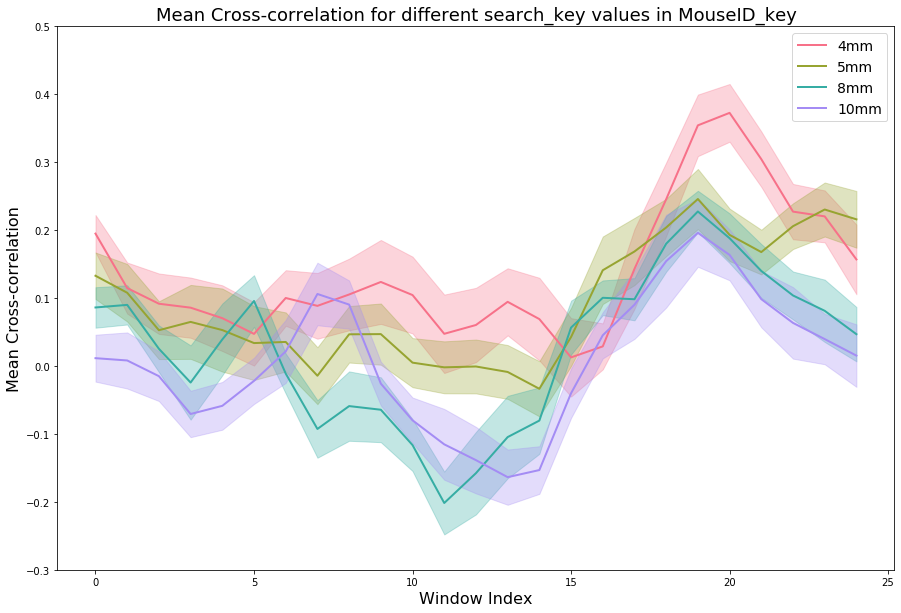

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot cross-correlation time series
colors = sns.color_palette("husl", len(search_key))
window_width = 3
search_key = ['4mm', '5mm', '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

for sk, color in zip(range(len(search_key)), colors):
    mean_c_uMOM = []
    sem_c_uMOM = []
    for i in range(85, 160, window_width):
        range_of_interest = [i, i + window_width]
        c_uMOM_values = []
        for mouse_id in MouseID_key:
            dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed = extract_uncompMom_speed(dict_ridge_all,
                                                                                                range_of_interest,
                                                                                                [search_key[sk]],
                                                                                                [mouse_id])
            # Do something with dict_uncompMom_speed for this range of interest
            c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, sk)
            c_uMOM_values.append(c_uMOM)
        mean_c_uMOM.append(np.mean(c_uMOM_values))
        sem_c_uMOM.append(np.std(c_uMOM_values) / np.sqrt(len(MouseID_key)))
    ax1.plot(range(len(mean_c_uMOM)), mean_c_uMOM, color=color, label=search_key[sk], linewidth=2)
    ax1.fill_between(range(len(mean_c_uMOM)), np.array(mean_c_uMOM) - np.array(sem_c_uMOM), np.array(mean_c_uMOM) + np.array(sem_c_uMOM), color=color, alpha=0.3)

ax1.set_ylim([-0.3, 0.5])
ax1.legend(fontsize=14)
ax1.set_xlabel("Window Index", fontsize=16)
ax1.set_ylabel("Mean Cross-correlation", fontsize=16)
ax1.set_title("Mean Cross-correlation for different search_key values in MouseID_key", fontsize=18)

# Save the figure
fig.savefig('cra.svg', format='svg', dpi=1200)


In [74]:
def forward_speed_bins(array):
    
    
    return fwd_speed_bins

In [75]:
def compute_ratio(a1, a2):
    if a1 > a2:
        ratio = a2 / a1
    elif a2 > a1:
        ratio = a1 / a2
    else:
        ratio = 1.0  # Equal values, ratio is 1.0

    return ratio


In [76]:
#compute dict with Tail Hips fwd speed values for cross-correlation matrix

def extract_uncompMom_speed_PC(dict_ridge_all: Dict[str, Dict[str, Tuple]],
                               range_of_interest1: List[int], range_of_interest2: List[int],
                               search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
#     MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)

#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
#     ax.axvline(range_of_interest[0],0,360, color = 'red')
#     ax.axvline(range_of_interest[1],0,360, color = 'red')    
    for search_key in search_key:
        fwd_speed_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        Tail_Hips_ratio_list = []
        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
            for i in range(len(key_list)):
                step_list = []
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMY_traj_wrt_step = COMX_traj_wrt_step[j][1]
#                     if len(tail_traj) == 250 and all(tail_traj > -100) and len(hip_traj) == 250:
                    if len(tail_traj)==250 and all(tail_traj>-50) and len(hip_traj)==250 and all(hip_traj<450) \
                    and all(hip_traj>0) and all(tail_traj<420):
                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
                        uncomp_mom = (HA_momentum+TA_momentum)
                        ##ang mom
                        uncomp_mom_pre_swing = np.nanmean(uncomp_mom[range_of_interest1[0]:range_of_interest1[1]])
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest2[0]:range_of_interest2[1]]))
                        ##tail/hips similarity 
#                         Tail_Hips_ratio = similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)

                        #fwd speed tot trial
#                         COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
#                         fwd_traj_cntrd0 = COMY - COMY[0]
#                         fwd_speed = forward_speed(fwd_traj_cntrd0)
                        #fwd speed during time bin
                        COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
                        fwd_traj_cntrd0 = COMY[range_of_interest2[0]:range_of_interest2[1]] - COMY[0]
#                         print(fwd_traj_cntrd0)
                        if len(fwd_traj_cntrd0):
                            fwd_speed = forward_speed(fwd_traj_cntrd0)
                        if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(fwd_speed):
                            fwd_speed_list.append(fwd_speed)
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            uncomp_mom_list.append(uncomp_mom)
#                             Tail_Hips_ratio_list.append(Tail_Hips_ratio)
#                             ax.plot(COMY_traj_wrt_step)

        dict_uncompMom_speed[search_key][mouse_id] = [tail_angmom_list, #(fwd_speed_list),# \
                                                      hip_angmom_list]#uncomp_mom_pre_swing_list
        dict_TAMom_speed[search_key][mouse_id] = [tail_angmom_list, fwd_speed_list]
        dict_HAMom_speed[search_key][mouse_id] = [hip_angmom_list, fwd_speed_list]

    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed

In [77]:
#compute dict with Tail Hips fwd speed values for cross-correlation matrix

def extract_similarity_speed_PC(dict_ridge_all: Dict[str, Dict[str, Tuple]],
                               range_of_interest1: List[int], range_of_interest2: List[int],
                               search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
#     MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)

#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
#     ax.axvline(range_of_interest[0],0,360, color = 'red')
#     ax.axvline(range_of_interest[1],0,360, color = 'red')    
    for search_key in search_key:
        fwd_speed_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        Tail_Hips_ratio_list = []
        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
            for i in range(len(key_list)):
                step_list = []
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMY_traj_wrt_step = COMX_traj_wrt_step[j][1]
                    if len(tail_traj) == 250 and all(tail_traj > -100) and len(hip_traj) == 250:
#                     if len(tail_traj)==250 and all(tail_traj>-50) and len(hip_traj)==250 and all(hip_traj<450)\
#                     and all(hip_traj>0) and all(tail_traj<420):                        
                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
                        uncomp_mom = (HA_momentum+TA_momentum)
                        ##ang mom
                        uncomp_mom_pre_swing = np.nanmean(uncomp_mom[range_of_interest1[0]:range_of_interest1[1]])
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest2[0]:range_of_interest2[1]]))
                        ##tail/hips similarity 
                        Tail_Hips_ratio = similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)

                        #fwd speed tot trial
#                         COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
#                         fwd_traj_cntrd0 = COMY - COMY[0]
#                         fwd_speed = forward_speed(fwd_traj_cntrd0)
                        #fwd speed during time bin
                        COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
                        fwd_traj_cntrd0 = COMY[range_of_interest2[0]:range_of_interest2[1]] - COMY[0]
#                         print(fwd_traj_cntrd0)
                        if len(fwd_traj_cntrd0):
                            fwd_speed = forward_speed(fwd_traj_cntrd0)
                        if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(fwd_speed):
                            fwd_speed_list.append(fwd_speed)
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            uncomp_mom_list.append(uncomp_mom)
                            Tail_Hips_ratio_list.append(Tail_Hips_ratio)
#                             ax.plot(COMY_traj_wrt_step)

        dict_uncompMom_speed[search_key][mouse_id] = [tail_angmom_list, #Tail_Hips_ratio_list, #tail_angmom_list, #(fwd_speed_list),# \
                                                      hip_angmom_list]#fwd_speed_list]#hip_angmom_list]#uncomp_mom_pre_swing_list
        dict_TAMom_speed[search_key][mouse_id] = [tail_angmom_list, fwd_speed_list]
        dict_HAMom_speed[search_key][mouse_id] = [hip_angmom_list, fwd_speed_list]

    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed


In [78]:
#compute dict with Tail Hips fwd speed values for cross-correlation matrix

def extract_similarity_COMx_PC(dict_ridge_all: Dict[str, Dict[str, Tuple]],
                               range_of_interest1: List[int], range_of_interest2: List[int],
                               search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
    Tail_idx = 7
    Hip_idx = 13
    step_idx = 4
    COMx_idx = 14
    dict_uncompMom_speed = defaultdict(dict)
    dict_TAMom_speed = defaultdict(dict)
    dict_HAMom_speed = defaultdict(dict)
    lineopacity = [1, 0.8, 0.5, 0.1]


#     fig, ax = plt.subplots(1, 1, figsize=(15,10))
#     ax.axvline(range_of_interest[0],0,360, color = 'red')
#     ax.axvline(range_of_interest[1],0,360, color = 'red')    
    for search_key in search_key:
        fwd_speed_list = []
        uncomp_mom_pre_swing_list = []
        tail_angmom_list = []
        hip_angmom_list = []
        uncomp_mom_list = []
        Tail_Hips_ratio_list = []
        CentX_traj_rel_pre_swing_list = []
        for mouse_id in MouseID_key:
            dict_ridge_Xwidth = dict_ridge_all[search_key]
            dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
            values_list = list(dict_ridge_XwidthXmouseID.values())
            key_list = list(dict_ridge_XwidthXmouseID.keys())
            for i in range(len(key_list)):
                COMX_traj_wrt_step = values_list[i][-1]
                for j in range(len(COMX_traj_wrt_step)):
                    tail_traj = COMX_traj_wrt_step[j][Tail_idx]
                    hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
                    step_traj  = COMX_traj_wrt_step[j][step_idx]
                    COMx_traj = COMX_traj_wrt_step[j][COMx_idx]
#                     if len(tail_traj)==250 and all(tail_traj>-50) and len(hip_traj)==250 and len(COMx_traj)==250 and all(hip_traj<450)\
#                     and all(hip_traj>0) and all(tail_traj<420) and len(COMx_traj)==250 and all(COMx_traj<5):
                    if len(tail_traj)==250 and all(tail_traj > -100) and len(hip_traj)==250 \
                    and len(COMx_traj)==250 and all(COMx_traj<5):

                        TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49#[0]+list((np.diff(tail_traj)) * 0.5 * (1/3) * 49)#[0]+list()
                        HA_momentum = (np.diff(hip_traj)) * 10 * 0.5#(hip_traj)#-270)#(np.diff(hip_traj)) * 10 * 0.5 * 4#abs(hip_traj-270)
                        uncomp_mom = (TA_momentum+HA_momentum)
                        ##ang mom
                        uncomp_mom_pre_swing = np.nanmean(uncomp_mom[range_of_interest1[0]:range_of_interest1[1]])
                        TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
                        HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
                        ##tail/hips similarity 
                        Tail_Hips_ratio = similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)

                        
                        #COMx rel dist
                        COMx_traj_nonNAN_mean, COMx_traj_rel = COMx_rel_dist(COMx_traj, sk)
                        #COMx rel dist wrt step
                        CentX_traj_rel_pre_swing = np.nanmean(COMx_traj_rel[range_of_interest2[0]:range_of_interest2[1]])#COMx_traj_rel[range_of_interest[0]]-COMx_traj_rel[range_of_interest[1]]
                        
                        if not math.isnan(uncomp_mom_pre_swing):# and not math.isnan(fwd_speed):
                            uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
                            tail_angmom_list.append(TA_momentum_pre_swing) 
                            hip_angmom_list.append(HA_momentum_pre_swing)
                            CentX_traj_rel_pre_swing_list.append(CentX_traj_rel_pre_swing)
                            Tail_Hips_ratio_list.append(Tail_Hips_ratio)

        dict_uncompMom_speed[search_key][mouse_id] = [Tail_Hips_ratio_list, #tail_angmom_list, #(fwd_speed_list),# \
                                                      CentX_traj_rel_pre_swing_list]#hip_angmom_list]#uncomp_mom_pre_swing_list
        dict_TAMom_speed[search_key][mouse_id] = [tail_angmom_list, CentX_traj_rel_pre_swing_list]
        dict_HAMom_speed[search_key][mouse_id] = [hip_angmom_list, CentX_traj_rel_pre_swing_list]

    return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed


In [79]:
# ##########Use this function to explore correlation matrix btw tail/hips and performance
# from typing import Dict, List, Tuple
# from collections import defaultdict
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# def extract_uncompMom_speed_PC(dict_ridge_all: Dict[str, Dict[str, Tuple]],
#                                range_of_interest1: List[int], range_of_interest2: List[int],
#                                search_key, MouseID_key) -> Dict[str, Dict[str, Tuple[List[float], List[float]]]]:
# #     MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
#     Tail_idx = 7
#     Hip_idx = 13
#     step_idx = 4
#     dict_uncompMom_speed = defaultdict(dict)
#     dict_TAMom_speed = defaultdict(dict)
#     dict_HAMom_speed = defaultdict(dict)

# #     fig, ax = plt.subplots(1, 1, figsize=(15,10))
# #     ax.axvline(range_of_interest[0],0,360, color = 'red')
# #     ax.axvline(range_of_interest[1],0,360, color = 'red')    
#     for search_key in search_key:
#         fwd_speed_list = []
#         uncomp_mom_pre_swing_list = []
#         tail_angmom_list = []
#         hip_angmom_list = []
#         uncomp_mom_list = []
#         step_list = []
#         Tail_Hips_ratio_list = []

#         for mouse_id in MouseID_key:
#             dict_ridge_Xwidth = dict_ridge_all[search_key]
#             dict_ridge_XwidthXmouseID = dict(filter(lambda item: mouse_id in item[0], dict_ridge_Xwidth.items()))
#             values_list = list(dict_ridge_XwidthXmouseID.values())
#             key_list = list(dict_ridge_XwidthXmouseID.keys())
#             for i in range(len(key_list)):
#                 step_list = []
#                 COMX_traj_wrt_step = values_list[i][-1]
#                 for j in range(len(COMX_traj_wrt_step)):
#                     tail_traj = COMX_traj_wrt_step[j][Tail_idx]
#                     hip_traj  = COMX_traj_wrt_step[j][Hip_idx]
#                     step_traj  = COMX_traj_wrt_step[j][step_idx]
#                     COMY_traj_wrt_step = COMX_traj_wrt_step[j][1]
#                     if len(tail_traj) == 250 and all(tail_traj > -100) and len(hip_traj) == 250:
#                         TA_momentum = (np.diff(tail_traj)) * 0.5 * (1/3) * 49
#                         HA_momentum = (np.diff(hip_traj)) * 10 * 0.5 * 4
#                         uncomp_mom = (HA_momentum+TA_momentum)
#                         ##ang mom
#                         uncomp_mom_pre_swing = np.nanmean(uncomp_mom[range_of_interest1[0]:range_of_interest1[1]])
#                         TA_momentum_pre_swing = abs(np.nanmean(TA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
#                         HA_momentum_pre_swing = abs(np.nanmean(HA_momentum[range_of_interest1[0]:range_of_interest1[1]]))
#                         Tail_Hips_ratio = similarity(TA_momentum_pre_swing, HA_momentum_pre_swing)

#                         #fwd speed
#                         COMY = COMY_traj_wrt_step[np.logical_not(numpy.isnan(COMY_traj_wrt_step))]
#                         fwd_traj_cntrd0 = COMY[range_of_interest2[0]:range_of_interest2[1]] - COMY[0]
# #                         print(fwd_traj_cntrd0)
#                         if len(fwd_traj_cntrd0):
#                             fwd_speed = forward_speed(fwd_traj_cntrd0)
#                         if not math.isnan(uncomp_mom_pre_swing) and not math.isnan(fwd_speed):
#                             fwd_speed_list.append(fwd_speed)
#                             uncomp_mom_pre_swing_list.append(uncomp_mom_pre_swing)
#                             tail_angmom_list.append(TA_momentum_pre_swing) 
#                             hip_angmom_list.append(HA_momentum_pre_swing)
#                             uncomp_mom_list.append(uncomp_mom)
#                             Tail_Hips_ratio_list.append(Tail_Hips_ratio)

#         dict_uncompMom_speed[search_key][mouse_id] = [Tail_Hips_ratio_list, #(fwd_speed_list),# \
#                                                       fwd_speed_list]#uncomp_mom_pre_swing_list
#         dict_TAMom_speed[search_key][mouse_id] = [tail_angmom_list, fwd_speed_list]
#         dict_HAMom_speed[search_key][mouse_id] = [hip_angmom_list, fwd_speed_list]

#     return dict_uncompMom_speed, dict_TAMom_speed, dict_HAMom_speed


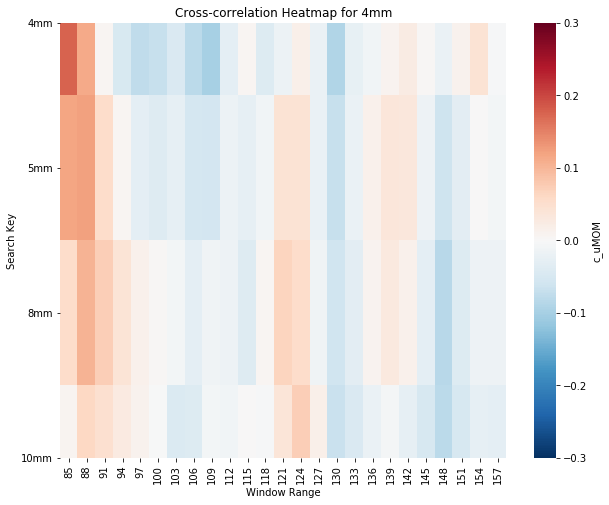

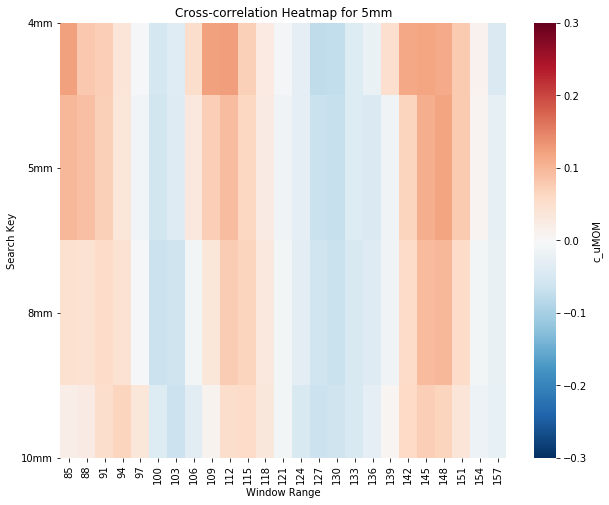

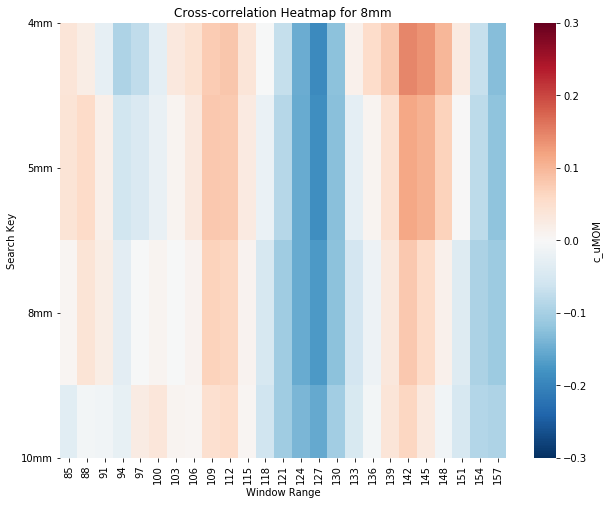

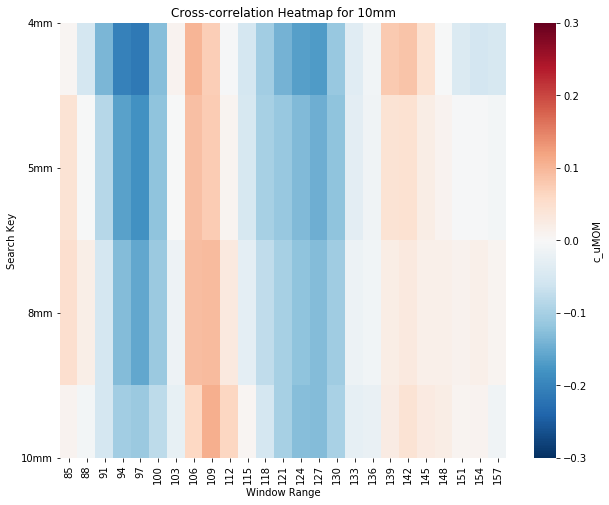

In [80]:
# Plot cross-correlation time series across all trias per each width 

# Function to generate correlation matrix for a list of search_key values
def generate_correlation_matrices(search_keys):
    # Plot cross-correlation time series
    colors = sns.color_palette("husl", len(search_keys))
    window_width = 3
    MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

    correlation_matrices = {}
    all_correlation_values = []  # To store all correlation values
    
    for search_key, color in zip(search_keys, colors):
        # Initialize the data array
        data = np.zeros((len(range(85, 160, window_width)), len(range(85, 160, window_width))))

        for i, val1 in enumerate(range(85, 160, window_width)):
            for j, val2 in enumerate(range(85, 160, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_similarity_speed_PC(dict_ridge_all, range_of_interest1, range_of_interest2, [search_key], MouseID_key)
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [search_key])
                data[i, j] = c_uMOM
                all_correlation_values.append(c_uMOM)  # Collect correlation values

        correlation_matrices[search_key] = data
    
    return correlation_matrices, all_correlation_values

# Example usage of the function to generate correlation matrices for search_keys
search_keys = ['4mm', '5mm', '8mm', '10mm']
correlation_matrices, all_correlation_values = generate_correlation_matrices(search_keys)

# # Convert the list to a numpy array for easier indexing
# all_correlation_values = np.array(all_correlation_values)

# # Print the highest and lowest 5 percentile correlation values
# highest_percentile = np.percentile(all_correlation_values, 95)
# lowest_percentile = np.percentile(all_correlation_values, 5)
# print(highest_percentile, highest_percentile)

# Plot and save each correlation matrix
for search_key, data in correlation_matrices.items():
    fig, ax1 = plt.subplots(figsize=(10, 8))
    sns.heatmap(data, cmap="RdBu_r", ax=ax1, vmin=-0.3, vmax=0.3)

    # Set the y-axis ticks and labels
    ax1.set_yticks(np.arange(len(search_keys)) + 0.5)
    ax1.set_yticklabels(search_keys, rotation=0)

    # Set the x-axis ticks and labels
    ax1.set_xticks(np.arange(len(range(85, 160, window_width))) + 0.5)
    ax1.set_xticklabels(range(85, 160, window_width), rotation=90)

    # Set the colorbar label
    cbar = ax1.collections[0].colorbar
    cbar.set_label('c_uMOM')

    # Set the plot title and axis labels
    ax1.set_title(f'Cross-correlation Heatmap for {search_key}')
    ax1.set_xlabel('Window Range')
    ax1.set_ylabel('Search Key')

    # Save the plot with a filename specific to the search_key
    plt.show()
    fig.savefig(f'heatmap_{search_key}.svg', format='svg', dpi=1200)
    



In [81]:
# Plot cross-correlation time series across all trias per each width and print out threshold


# Function to generate correlation matrix for a list of search_key values
def generate_correlation_matrices(search_keys):
    # Plot cross-correlation time series
    colors = sns.color_palette("husl", len(search_keys))
    window_width = 3
    MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

    correlation_matrices = {}
    all_correlation_values = []  # To store all correlation values
    
    for search_key, color in zip(search_keys, colors):
        # Initialize the data array
        data = np.zeros((len(range(85, 160, window_width)), len(range(85, 160, window_width))))

        for i, val1 in enumerate(range(85, 160, window_width)):
            for j, val2 in enumerate(range(85, 160, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_similarity_speed_PC(dict_ridge_all, range_of_interest1, range_of_interest2, [search_key], MouseID_key)
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [search_key])
                data[i, j] = c_uMOM
                all_correlation_values.append(c_uMOM)  # Collect correlation values

        correlation_matrices[search_key] = data
    
    return correlation_matrices, all_correlation_values

# Example usage of the function to generate correlation matrices for search_keys
search_keys = ['10mm', '5mm', '8mm', '10mm']
correlation_matrices, all_correlation_values = generate_correlation_matrices(search_keys)

# Convert the list to a numpy array for easier indexing
all_correlation_values = np.array(all_correlation_values)

# Find the highest and lowest 5 percentile correlation values
highest_percentile = np.percentile(all_correlation_values, 97)
lowest_percentile = np.percentile(all_correlation_values, 3)

print("Highest 5 percentile correlation value:")
print(highest_percentile)

print("\nLowest 5 percentile correlation value:")
print(lowest_percentile)

# Plot and save each correlation matrix
for search_key, data in correlation_matrices.items():
    fig, ax1 = plt.subplots(figsize=(10, 8))
    sns.heatmap(data, cmap="RdBu_r", ax=ax1, vmin=-0.3, vmax=0.3)

    # Set the y-axis ticks and labels
    ax1.set_yticks(np.arange(len(search_keys)) + 0.5)
    ax1.set_yticklabels(search_keys, rotation=0)

    # Set the x-axis ticks and labels
    ax1.set_xticks(np.arange(len(range(85, 160, window_width))) + 0.5)
    ax1.set_xticklabels(range(85, 160, window_width), rotation=90)

    # Set the colorbar label
    cbar = ax1.collections[0].colorbar
    cbar.set_label('c_uMOM')

    # Set the plot title and axis labels
    ax1.set_title(f'Cross-correlation Heatmap for {search_key}')
    ax1.set_xlabel('Window Range')
    ax1.set_ylabel('Search Key')

    # Save the plot with a filename specific to the search_key
    fig.savefig(f'heatmap_{search_key}.svg', format='svg', dpi=1200)
    plt.close()



Highest 5 percentile correlation value:
0.1555772667730535

Lowest 5 percentile correlation value:
-0.16340015433558447


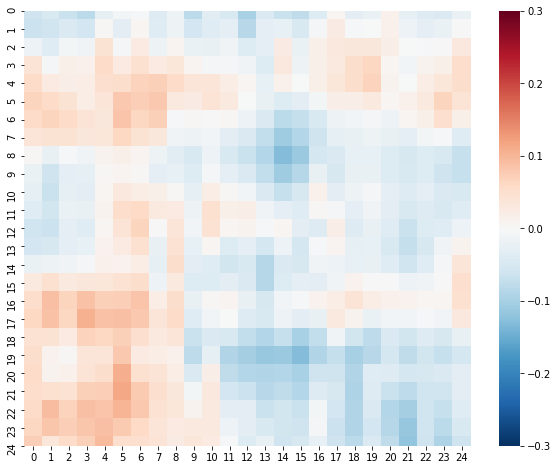

In [82]:
# Plot cross-correlation time series across all trias per one width and highlight based on threshold

threshold_red = 0.15557726677305303#0.12149437520597106
threshold_blue = -0.16340015433558397#-0.1492289978087712

colors = sns.color_palette("husl", 4)
window_width = 3
search_key = ['10mm']#, '5mm', '8mm', '10mm']
MouseID_key = [ 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data array
data = np.zeros((len(range(85, 160, window_width)), len(range(85, 160, window_width))))

for i, val1 in enumerate(range(85, 160, window_width)):
    for j, val2 in enumerate(range(85, 160, window_width)):
        range_of_interest1 = [val1, val1 + window_width]
        range_of_interest2 = [val2, val2 + window_width]
        _, dict_uncompMom_speed, _ = extract_similarity_speed_PC(dict_ridge_all, range_of_interest1, range_of_interest2, search_key, MouseID_key)
        c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, search_key)
#         print(c_uMOM)
        data[i, j] = c_uMOM

        
# print(data)
# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data, cmap="RdBu_r", ax=ax, vmin=-0.3, vmax=0.3)




# Binarize the heatmap based on thresholds
data_bin = np.where(data > threshold_red, 1, np.where(data < threshold_blue, -1, 0))

# Add red and blue highlights
for i in range(data_bin.shape[0]):
    for j in range(data_bin.shape[1]):
        if data_bin[i, j] == 1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='red'))
        elif data_bin[i, j] == -1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='blue'))
            


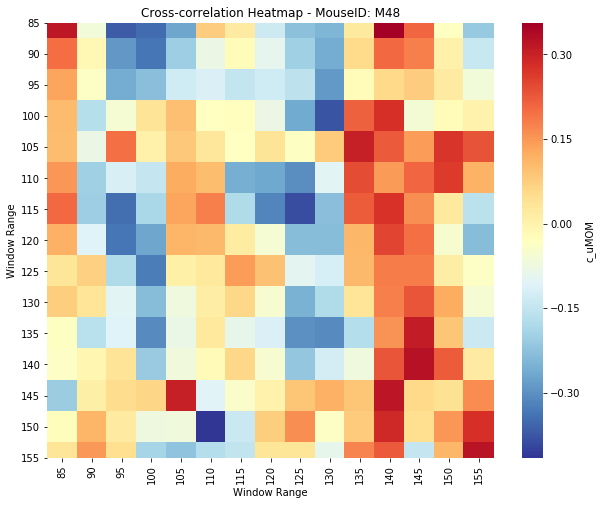

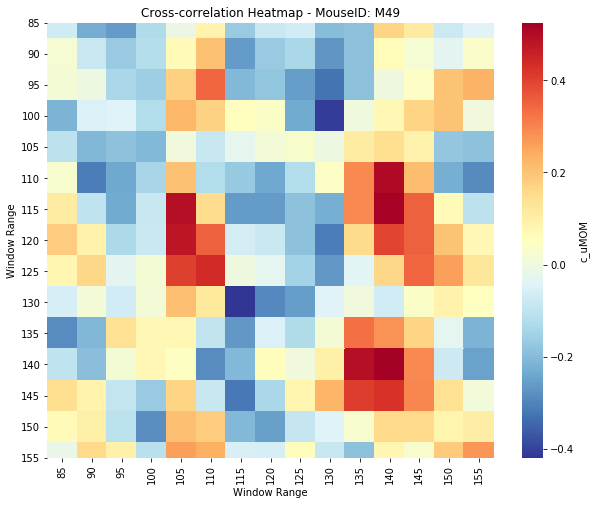

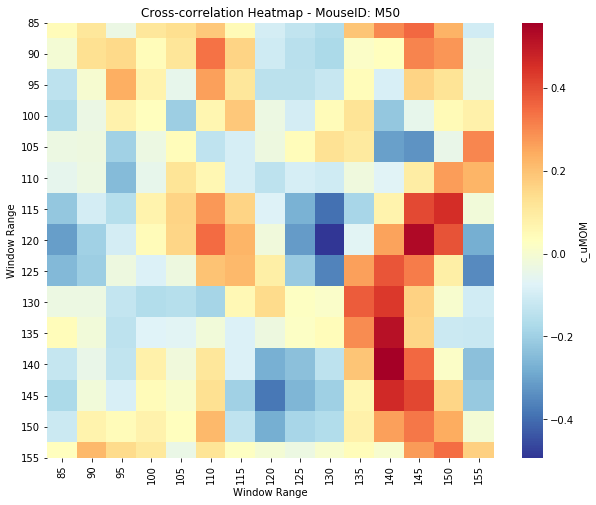

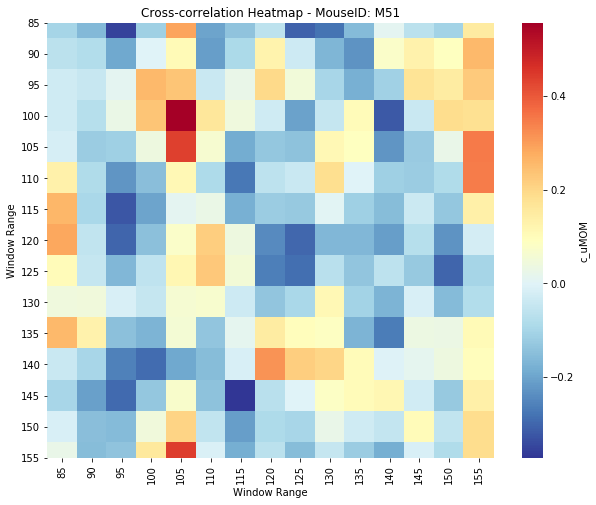

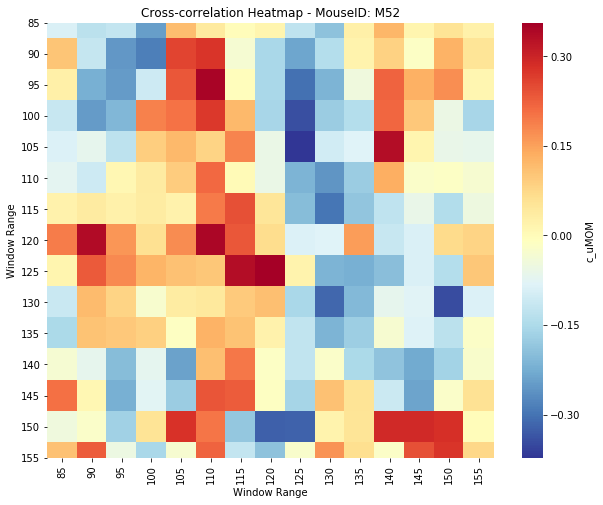

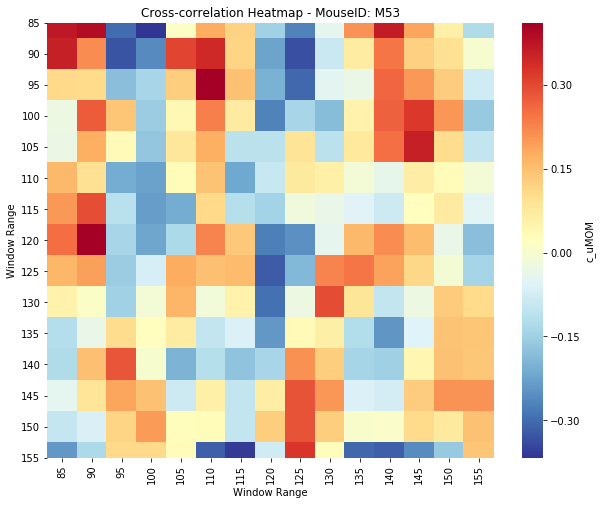

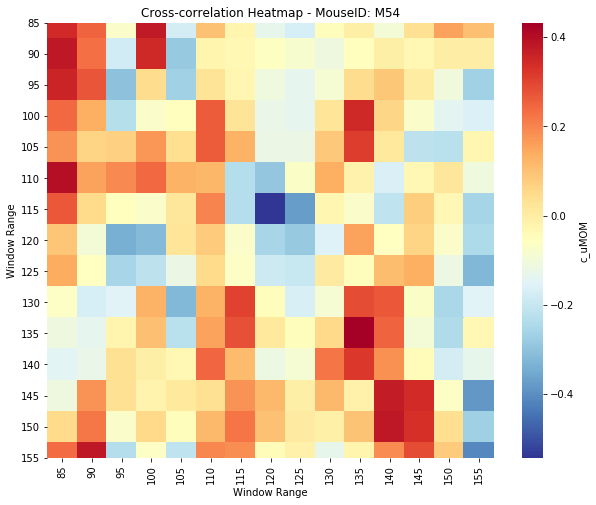

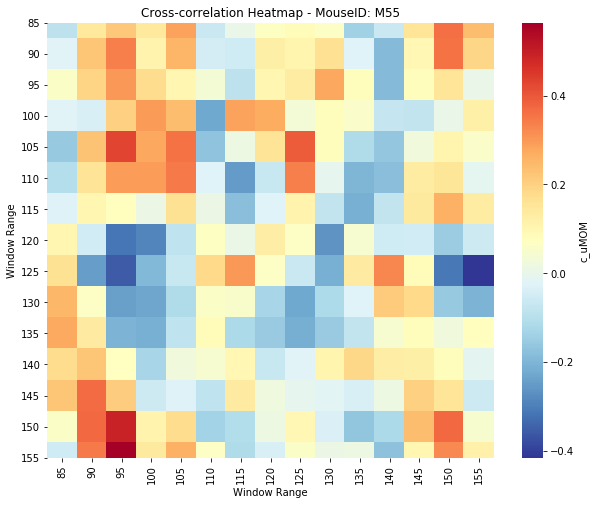

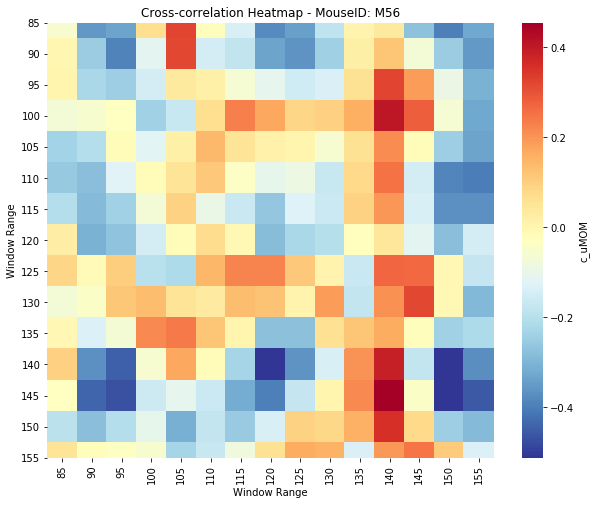

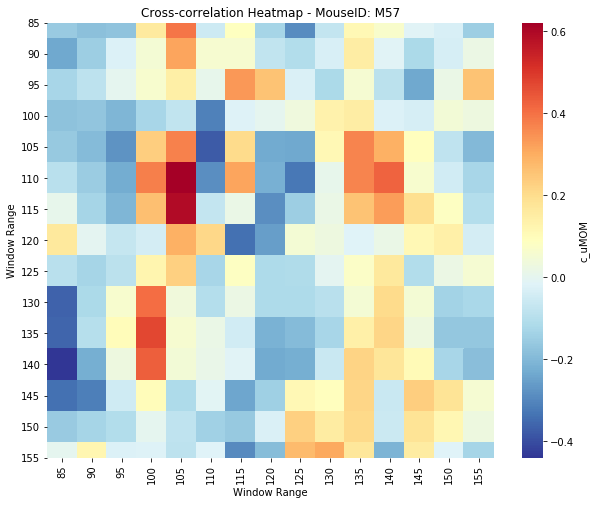

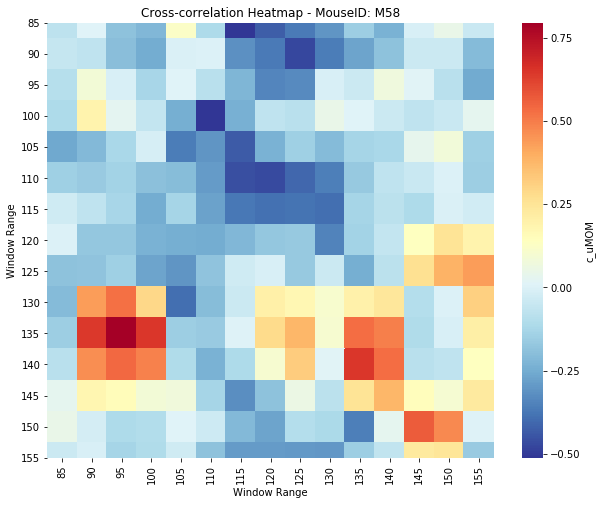

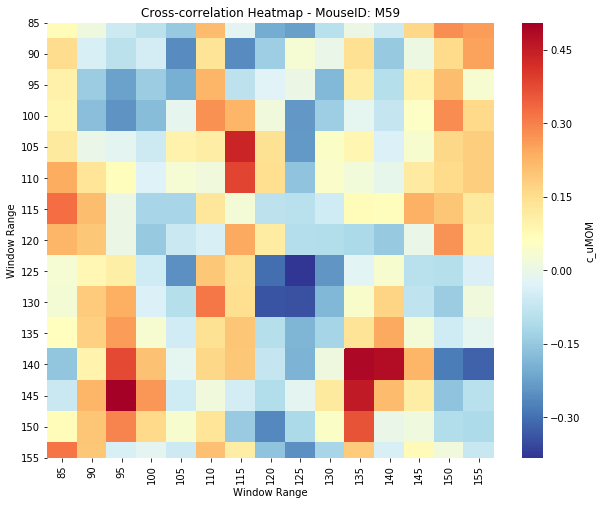

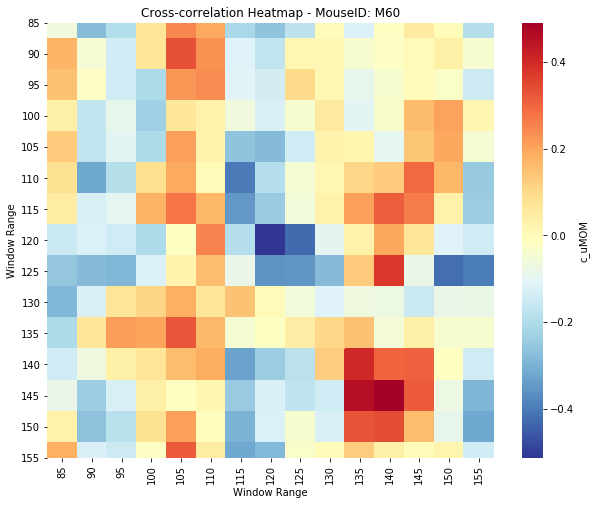

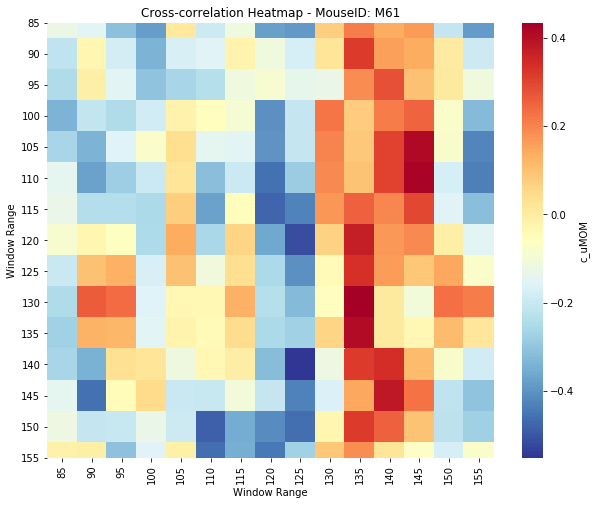

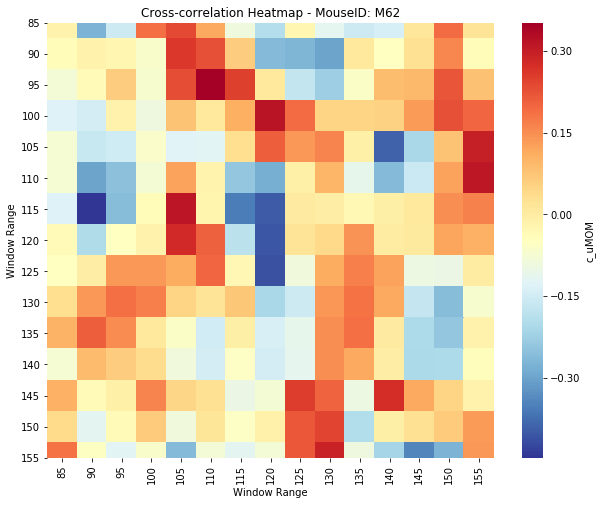

In [83]:
#Plot correlation coefficients as mean across MouseIDs

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 5
search_key = ['10mm']  # ['5mm', '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Iterate over each MouseID key
for mouse_id in MouseID_key:
    # Initialize the data array
    num_rows = len(range(85, 160, window_width))
    num_cols = len(range(85, 160, window_width))
    data = np.zeros((num_rows, num_cols))

    # Iterate over each search key
    for i, key in enumerate(search_key):
        for j, val1 in enumerate(range(85, 160, window_width)):
            for k, val2 in enumerate(range(85, 160, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_uncompMom_speed_PC(dict_ridge_all, range_of_interest1, range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data[j, k] = c_uMOM

        # Create the heatmap
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(data, cmap="RdYlBu_r", ax=ax)

        # Set the x-axis ticks and labels
        ax.set_xticks(np.arange(len(range(85, 160, window_width))) + 0.5)
        ax.set_xticklabels(range(85, 160, window_width), rotation=90)

        # Set the y-axis ticks and labels
        ax.set_yticks(np.arange(len(range(85, 160, window_width))) + 0.5)
        ax.set_yticklabels(range(85, 160, window_width), rotation=0)

        # Set the colorbar label
        cbar = ax.collections[0].colorbar
        cbar.set_label('c_uMOM')

        # Set the plot title and axis labels
        ax.set_title(f'Cross-correlation Heatmap - MouseID: {mouse_id}')
        ax.set_xlabel('Window Range')
        ax.set_ylabel('Window Range')

        # Show the plot
        plt.show()

    # Save the plot
    fig.savefig(f'heatmap_{mouse_id}.svg', format='svg', dpi=1200)
    plt.close(fig)


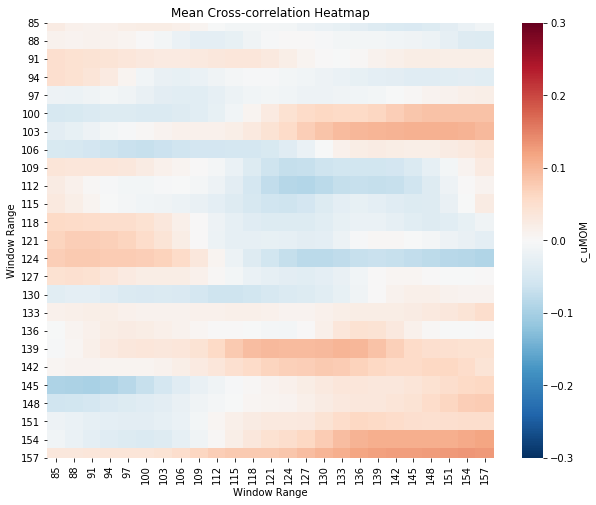

In [84]:
#Get mean cross-corr heatmap across MouseID for each width

# Initialize values
val1_start = 85#change this values based on the width. 4mm ()
val1_end = 160

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 3
search_key = ['4mm']  # ['5mm', '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data array
num_rows = len(range(val1_start, val1_end, window_width))
num_cols = len(range(val1_start, val1_end, window_width))
data_sum = np.zeros((num_rows, num_cols))
data_count = np.zeros((num_rows, num_cols))

# Iterate over each MouseID key
for mouse_id in MouseID_key:
    # Initialize the data array for the current MouseID key
    data = np.zeros((num_rows, num_cols))

    # Iterate over each search key
    for i, key in enumerate(search_key):
        for j, val1 in enumerate(range(val1_start, val1_end, window_width)):
            for k, val2 in enumerate(range(val1_start, val1_end, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_similarity_COMx_PC(dict_ridge_all, range_of_interest1, range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data[j, k] = c_uMOM

        # Add the data to the sum and count arrays
        data_sum += data
        data_count += 1

# Calculate the mean matrix
data_mean = data_sum / data_count

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.3, vmax=0.3)

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

# Set the y-axis ticks and labels
ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

# Set the colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('c_uMOM')

# Set the plot title and axis labels
ax.set_title('Mean Cross-correlation Heatmap')
ax.set_xlabel('Window Range')
ax.set_ylabel('Window Range')

# Save the plot
fig.savefig('mean_heatmap.svg', format='svg', dpi=1200)
plt.show()


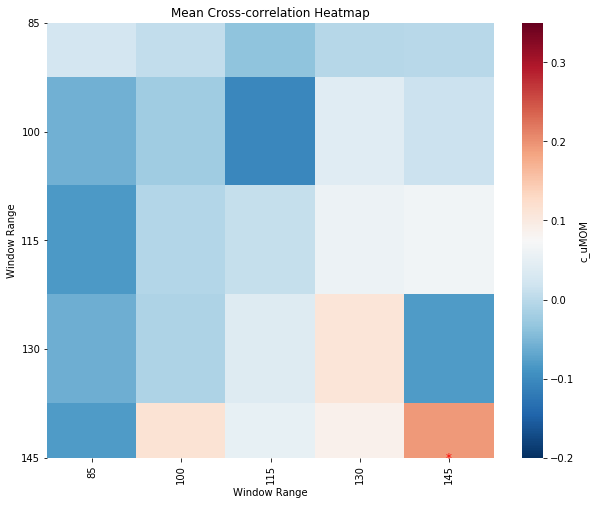

In [85]:
#Plot matrix heatmap wotj asterisk on highest point in the diagonal

# Initialize values
val1_start = 85  # change this value based on the width. 4mm ()
val1_end = 160

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 15
search_key = ['4mm', '5mm']#, '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data array
num_rows = len(range(val1_start, val1_end, window_width))
num_cols = len(range(val1_start, val1_end, window_width))
data_sum = np.zeros((num_rows, num_cols))
data_count = np.zeros((num_rows, num_cols))

# Iterate over each MouseID key
for mouse_id in MouseID_key:
    # Initialize the data array for the current MouseID key
    data = np.zeros((num_rows, num_cols))

    # Iterate over each search key
    for i, key in enumerate(search_key):
        for j, val1 in enumerate(range(val1_start, val1_end, window_width)):
            for k, val2 in enumerate(range(val1_start, val1_end, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_uncompMom_speed_PC(dict_ridge_all, range_of_interest1,
                                                                        range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data[j, k] = c_uMOM

        # Add the data to the sum and count arrays
        data_sum += data
        data_count += 1

# Calculate the mean matrix
data_mean = data_sum / data_count

# Find the index of the maximum value along the diagonal
max_index = np.argmax(np.diagonal(data_mean))

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.2, vmax=0.35)

# Add asterisk to the cell with the highest value along the diagonal
ax.text(max_index + 0.5, max_index + 0.5, "*", ha='center', va='center', fontsize=12, color='red')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

# Set the y-axis ticks and labels
ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

# Set the colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('c_uMOM')

# Set the plot title and axis labels
ax.set_title('Mean Cross-correlation Heatmap')
ax.set_xlabel('Window Range')
ax.set_ylabel('Window Range')

# Save the plot
fig.savefig('mean_heatmap.svg', format='svg', dpi=1200)
plt.show()


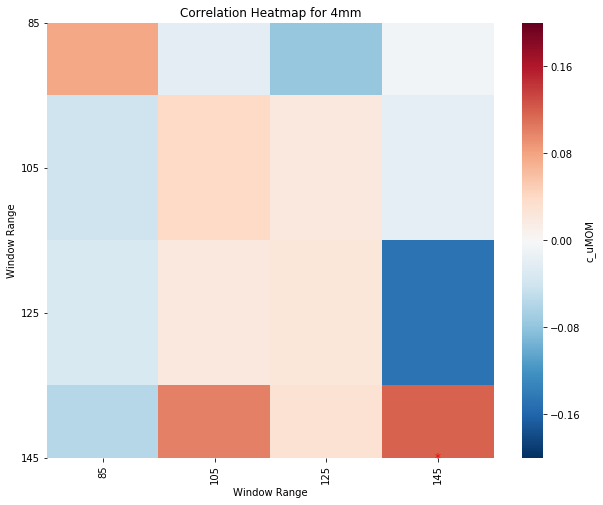

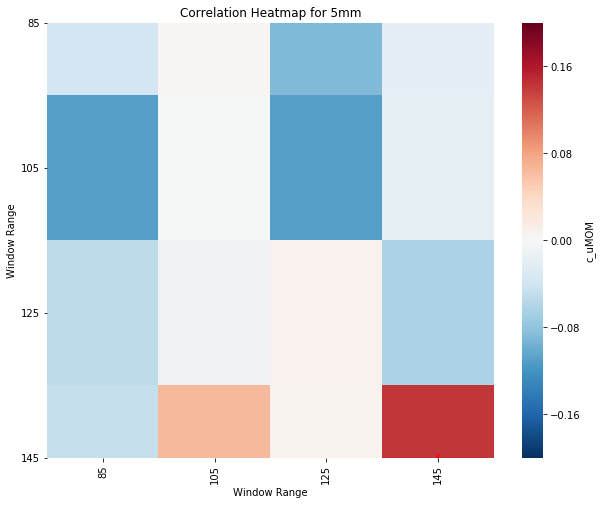

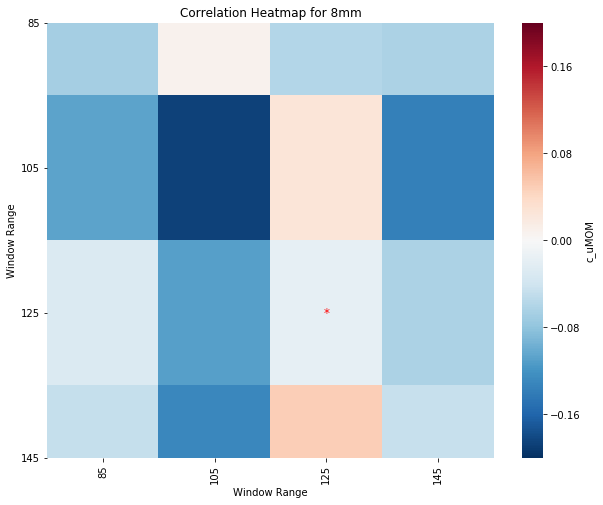

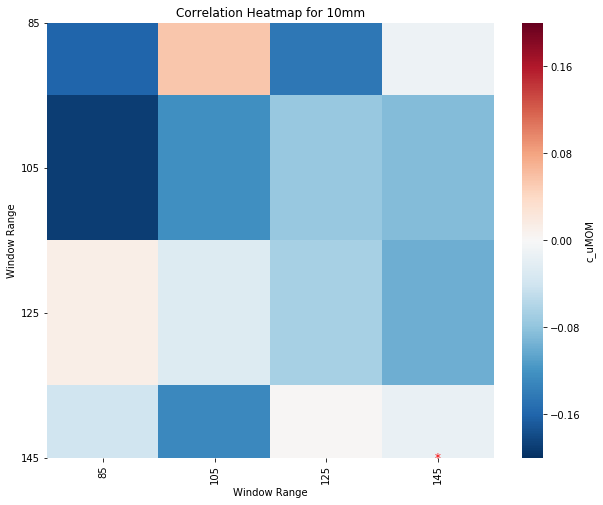

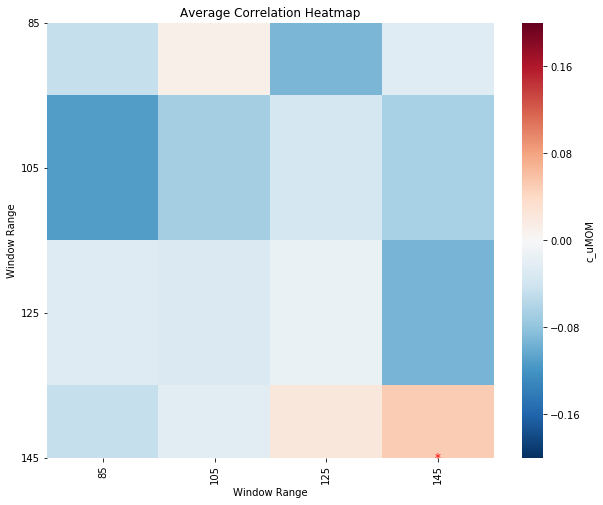

In [86]:
#Plot a different heatmap matrix for each width, then calculate the average heatmaps across widths

# Initialize values
val1_start = 85  # change this value based on the width. 4mm ()
val1_end = 160

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 20
search_key = ['4mm', '5mm', '8mm', '10mm']#, 'Wei']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data arrays
num_rows = len(range(val1_start, val1_end, window_width))
num_cols = len(range(val1_start, val1_end, window_width))
data_sum = np.zeros((num_rows, num_cols))
data_count = np.zeros((num_rows, num_cols))

# Iterate over each search key
for key in search_key:
    # Initialize the data array for the current search key
    data = np.zeros((num_rows, num_cols))

    # Iterate over each MouseID key
    for mouse_id in MouseID_key:
        # Initialize the data array for the current MouseID key
        data_mouse = np.zeros((num_rows, num_cols))

        for j, val1 in enumerate(range(val1_start, val1_end, window_width)):
            for k, val2 in enumerate(range(val1_start, val1_end, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_similarity_speed_PC(dict_ridge_all, range_of_interest1,
                                                                        range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data_mouse[j, k] = c_uMOM

        # Add the data for the current MouseID key to the sum array
        data_sum += data_mouse
        data_count += 1

        # Add the data for the current MouseID key to the current search key data array
        data += data_mouse

    # Calculate the mean matrix for the current search key
    data_mean = data / len(MouseID_key)

    # Find the index of the maximum value along the diagonal
    max_index = np.argmax(np.diagonal(data_mean))

    # Create the heatmap for the current search key
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.2, vmax=0.2)

    # Add asterisk to the cell with the highest value along the diagonal
    ax.text(max_index + 0.5, max_index + 0.5, "*", ha='center', va='center', fontsize=12, color='red')

    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
    ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

    # Set the y-axis ticks and labels
    ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
    ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

    # Set the colorbar label
    cbar = ax.collections[0].colorbar
    cbar.set_label('c_uMOM')

    # Set the plot title and axis labels
    ax.set_title(f"Correlation Heatmap for {key}")
    ax.set_xlabel('Window Range')
    ax.set_ylabel('Window Range')

    # Save the plot
    fig.savefig(f'correlation_heatmap_{key}.svg', format='svg', dpi=1200)
    plt.show()

# Calculate the average correlation matrix
data_mean = data_sum / data_count

# Find the index of the maximum value along the diagonal
max_index = np.argmax(np.diagonal(data_mean))

# Create the average correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.2, vmax=0.2)

# Add asterisk to the cell with the highest value along the diagonal
ax.text(max_index + 0.5, max_index + 0.5, "*", ha='center', va='center', fontsize=12, color='red')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

# Set the y-axis ticks and labels
ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

# Set the colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('c_uMOM')

# Set the plot title and axis labels
ax.set_title('Average Correlation Heatmap')
ax.set_xlabel('Window Range')
ax.set_ylabel('Window Range')

# Save the plot
fig.savefig('average_correlation_heatmap.svg', format='svg', dpi=1200)
plt.show()


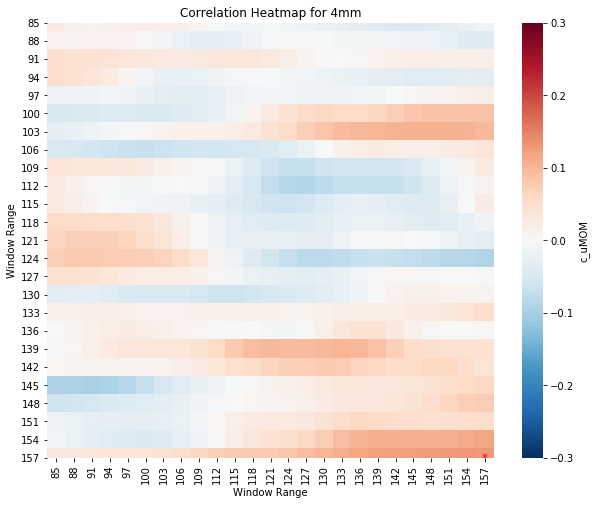

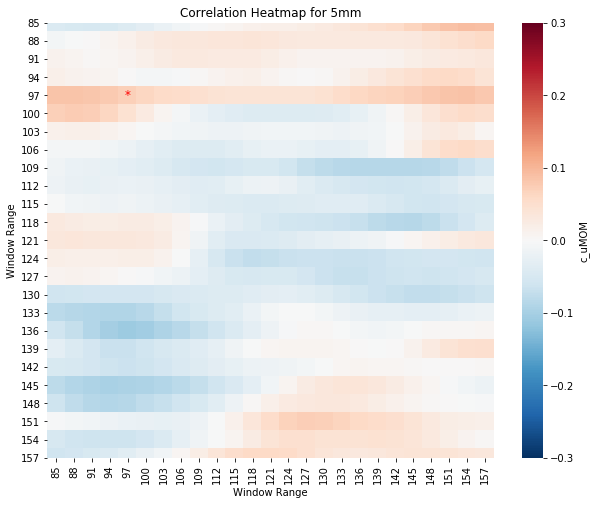

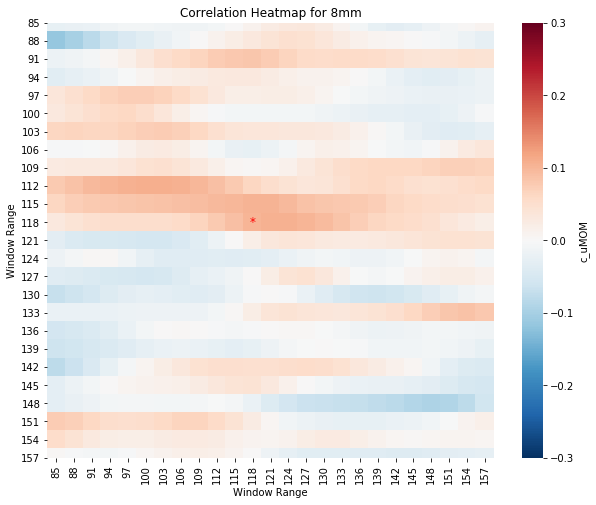

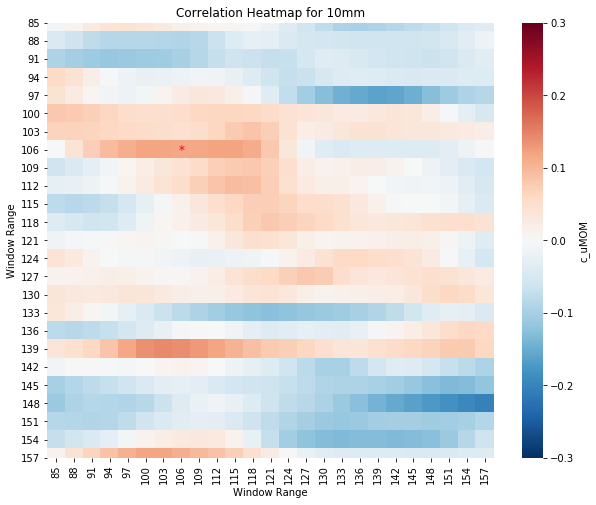

bla


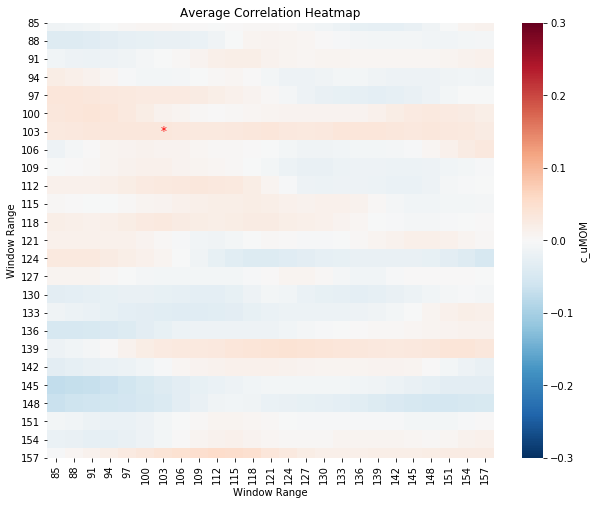

In [87]:
# Initialize values
val1_start = 85  # change this value based on the width. 4mm ()
val1_end = 160

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 3
search_key = ['4mm', '5mm', '8mm', '10mm']#, 'Wei']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data arrays
num_rows = len(range(val1_start, val1_end, window_width))
num_cols = len(range(val1_start, val1_end, window_width))
data_sum = np.zeros((num_rows, num_cols))
data_count = np.zeros((num_rows, num_cols))

# Iterate over each search key
for key in search_key:
    # Initialize the data array for the current search key
    data = np.zeros((num_rows, num_cols))

    # Iterate over each MouseID key
    for mouse_id in MouseID_key:
        # Initialize the data array for the current MouseID key
        data_mouse = np.zeros((num_rows, num_cols))

        for j, val1 in enumerate(range(val1_start, val1_end, window_width)):
            for k, val2 in enumerate(range(val1_start, val1_end, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_similarity_COMx_PC(dict_ridge_all, range_of_interest1,
                                                                        range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data_mouse[j, k] = c_uMOM

        # Add the data for the current MouseID key to the sum array
        data_sum += data_mouse
        data_count += 1

        # Add the data for the current MouseID key to the current search key data array
        data += data_mouse

    # Calculate the mean matrix for the current search key
    data_mean = data / len(MouseID_key)

    # Find the index of the maximum value along the diagonal
    max_index = np.argmax(np.diagonal(data_mean))

    # Create the heatmap for the current search key
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.3, vmax=0.3)

    # Add asterisk to the cell with the highest value along the diagonal
    ax.text(max_index + 0.5, max_index + 0.5, "*", ha='center', va='center', fontsize=12, color='red')

    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
    ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

    # Set the y-axis ticks and labels
    ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
    ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

    # Set the colorbar label
    cbar = ax.collections[0].colorbar
    cbar.set_label('c_uMOM')

    # Set the plot title and axis labels
    ax.set_title(f"Correlation Heatmap for {key}")
    ax.set_xlabel('Window Range')
    ax.set_ylabel('Window Range')

    # Save the plot
    fig.savefig(f'correlation_heatmap_{key}.svg', format='svg', dpi=1200)
    plt.show()

# Calculate the average correlation matrix
data_mean = data_sum / data_count

# Find the index of the maximum value along the diagonal
max_index = np.argmax(np.diagonal(data_mean))

# Create the average correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_mean, cmap="RdBu_r", ax=ax, vmin=-0.3, vmax=0.3)

# Add asterisk to the cell with the highest value along the diagonal
ax.text(max_index + 0.5, max_index + 0.5, "*", ha='center', va='center', fontsize=12, color='red')

# Set the x-axis ticks and labels
ax.set_xticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_xticklabels(range(val1_start, val1_end, window_width), rotation=90)

# Set the y-axis ticks and labels
ax.set_yticks(np.arange(len(range(val1_start, val1_end, window_width))) + 0.5)
ax.set_yticklabels(range(val1_start, val1_end, window_width), rotation=0)

# Set the colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('c_uMOM')

# Set the plot title and axis labels
ax.set_title('Average Correlation Heatmap')
ax.set_xlabel('Window Range')
ax.set_ylabel('Window Range')
print('bla')
# Save the plot
fig.savefig('average_correlation_heatmap.svg', format='svg', dpi=1200)
plt.show()

In [88]:
#choose threshold values 

val1_start = 85  # change this value based on the width. 4mm ()
val1_end = 160

# Plot cross-correlation time series
colors = sns.color_palette("husl", 4)
window_width = 3
search_key = ['4mm', '5mm', '8mm', '10mm']
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

# Initialize the data arrays
num_rows = len(range(val1_start, val1_end, window_width))
num_cols = len(range(val1_start, val1_end, window_width))
data_sum = np.zeros((num_rows, num_cols))
data_count = np.zeros((num_rows, num_cols))

# Initialize an empty list to store all the correlation values
all_correlation_values = []

# Iterate over each search key
for key in search_key:
    # Iterate over each MouseID key
    for mouse_id in MouseID_key:
        # Initialize the data array for the current MouseID key
        data_mouse = np.zeros((num_rows, num_cols))

        for j, val1 in enumerate(range(val1_start, val1_end, window_width)):
            for k, val2 in enumerate(range(val1_start, val1_end, window_width)):
                range_of_interest1 = [val1, val1 + window_width]
                range_of_interest2 = [val2, val2 + window_width]
                dict_uncompMom_speed, _, _ = extract_uncompMom_speed_PC(dict_ridge_all, range_of_interest1,
                                                                        range_of_interest2, [key], [mouse_id])
                c_uMOM = plot_regression_alldata_norm_noplots(dict_uncompMom_speed, [key])
                data_mouse[j, k] = c_uMOM

        # Add the data for the current MouseID key to the sum array
        data_sum += data_mouse
        data_count += 1



    # Calculate the mean matrix for the current search key
    data_mean = data_sum / data_count

    # Find the index of the maximum value along the diagonal
    max_index = np.argmax(np.diagonal(data_mean))

    # Calculate the threshold values
    # Collect the correlation values from the current data matrix
    all_correlation_values.extend(data_mean.flatten())
    



# Calculate the average correlation matrix
data_mean = data_sum / data_count

# Find the index of the maximum value along the diagonal
max_index = np.argmax(np.diagonal(data_mean))

# Calculate the threshold values
threshold_low = np.percentile(all_correlation_values, 4)
threshold_high = np.percentile(all_correlation_values, 96)
print(threshold_low)
print(threshold_high)



-0.07419422151532622
0.15955898673096278
